# Census Income Project 

Problem Statement:

This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight):

The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

1.A single cell estimate of the population 16+ for each state.

2.Controls for Hispanic Origin by age and sex.

3.Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

Downlaod Files:
https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')

In [4]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [5]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [6]:
df.shape

(32560, 15)

# Exploratory Data Analysis (EDA)

In [7]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

<AxesSubplot:>

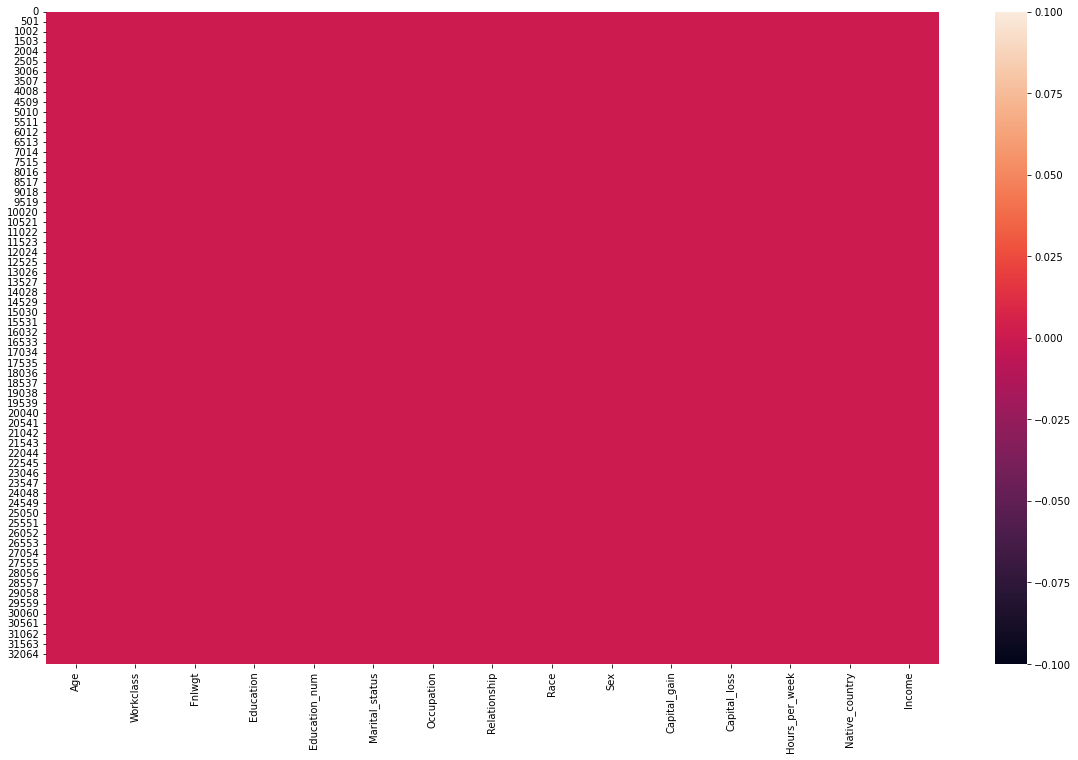

In [8]:
#Checking Null Values using HeatMap
plt.figure(figsize=(20,12))
sns.heatmap(df.isnull())

we see that there is no null value present in our DataFrame

In [9]:
#Checking description of data set
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


we see that
min ,25%,50%,75% of Capital_gain and Capital_loss columns are 0.It means maximum value of the Capital_gain and Capital_loss volumns are 0

In [11]:
df.dtypes.index

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [15]:
#checking for categorical columns
categorical_columns=[]
index_c=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        categorical_columns.append(i)
        index_c.append(m)
    m=m+1
print(categorical_columns)
print(index_c)

['Workclass', 'Education', 'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex', 'Native_country', 'Income']
[1, 3, 5, 6, 7, 8, 9, 13, 14]


So we can see this all are categorical columns

In [16]:
len(categorical_columns)

9

In [19]:
# Now checking for numerical columns
numerical_columns=[]
index_n=[]
m=0
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_columns.append(i)
        index_n.append(m)
    m=m+1
print(numerical_columns)
print(index_n)

['Age', 'Fnlwgt', 'Education_num', 'Capital_gain', 'Capital_loss', 'Hours_per_week']
[0, 2, 4, 10, 11, 12]


So we can see here this all are numerical columns

In [20]:
len(numerical_columns)

6

In [23]:
len(df.dtypes.index)==len(categorical_columns)+len(numerical_columns)

True

# Univariate Analysis 

column name Workclass


<bound method IndexOpsMixin.value_counts of 0         Self-emp-not-inc
1                  Private
2                  Private
3                  Private
4                  Private
               ...        
32555              Private
32556              Private
32557              Private
32558              Private
32559         Self-emp-inc
Name: Workclass, Length: 32560, dtype: object>


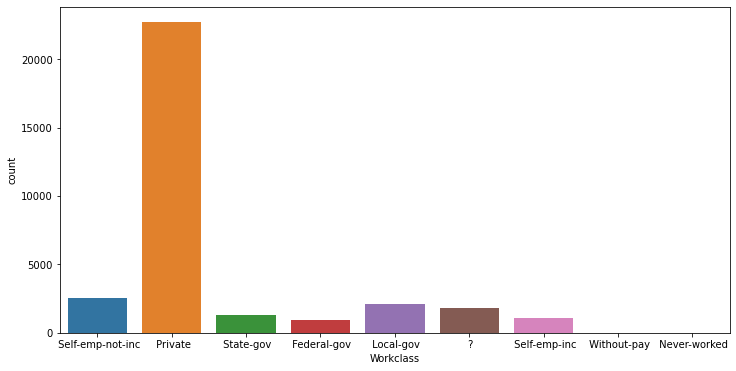



####################################################################################################


In [28]:
i =1
print("column name",df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts)
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print("\n")
print('#'*100)

we can see that in above graph that maximum people workclass in private

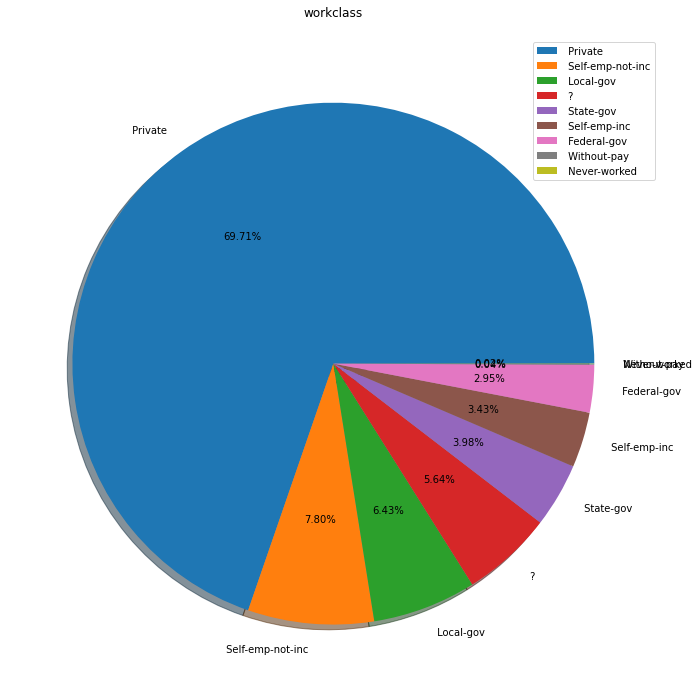

In [35]:
plt.figure(figsize=(20,12))
plt.pie(df['Workclass'].value_counts(),labels=df['Workclass'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('workclass\n')
plt.legend(prop={'size':10})
plt.show()

column name Education


 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


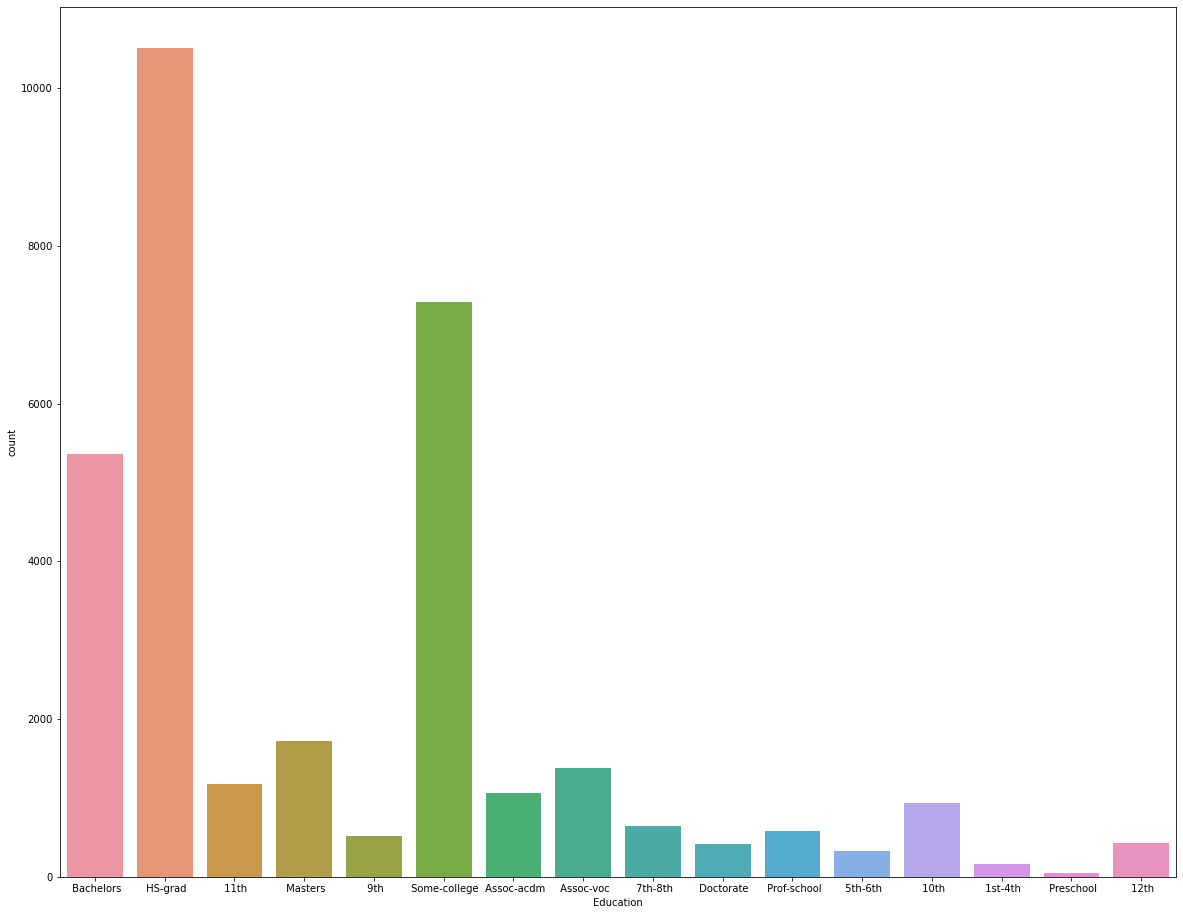



####################################################################################################


In [39]:
i = 3
print('column name',df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(20,16))
sns.countplot(df[df.columns[i]])
plt.show()
print("\n")
print('#'*100)

we can see in  above graph that 'bachelors','hs-grad','some-collage' are high value 

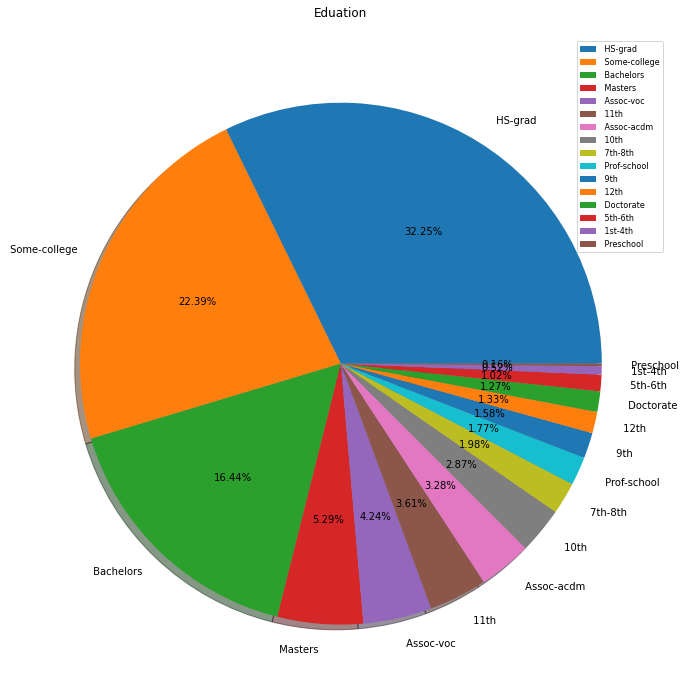

In [46]:
plt.figure(figsize=(20,12))
plt.pie(df['Education'].value_counts(),labels=df['Education'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Eduation\n')
plt.legend(prop={'size':8})
plt.show()


column name Marital_status


 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


####################################################################################################


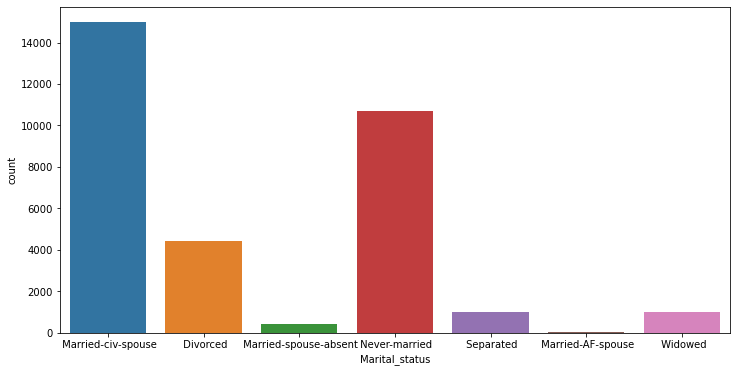

In [49]:
i = 5
print('column name',df.columns[i])
print("\n")
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
print('\n')
print('#'*100)

we can see in above graph that high value present in 'Married-civ-spouse,Divorced,Never-married Marital_status'

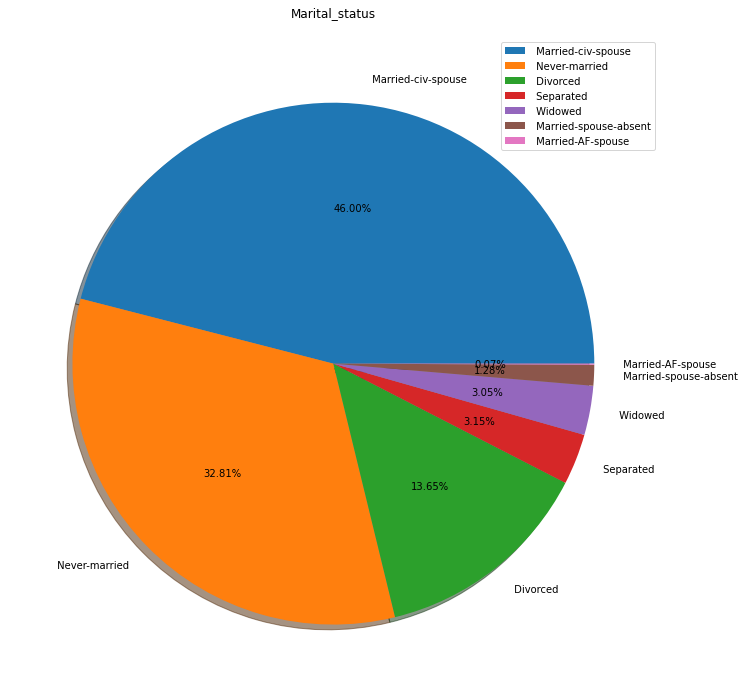

In [56]:
plt.figure(figsize=(20,12))
plt.pie(df['Marital_status'].value_counts(), labels=df['Marital_status'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Marital_status\n')
plt.legend(prop={'size':10})
plt.show()

column name Occupation


 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64


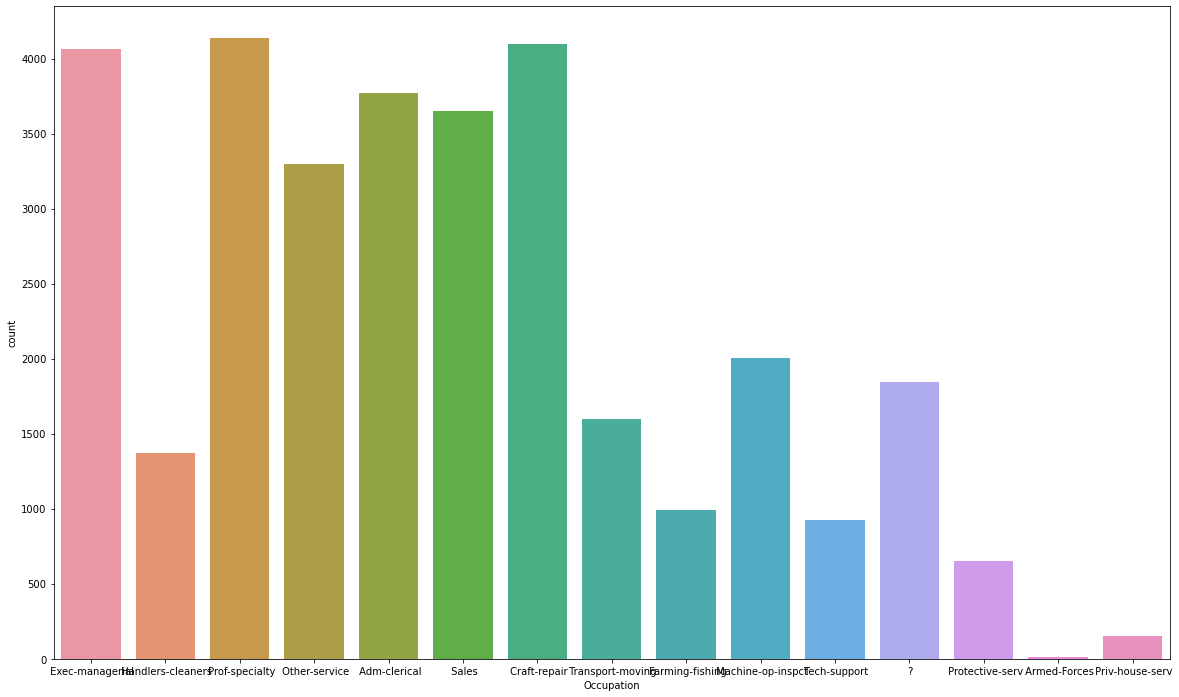



####################################################################################################


In [59]:
i = 6
print('column name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(20,12))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

In above graph we can see most of the columns a high occupation

column name Relationship


 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64


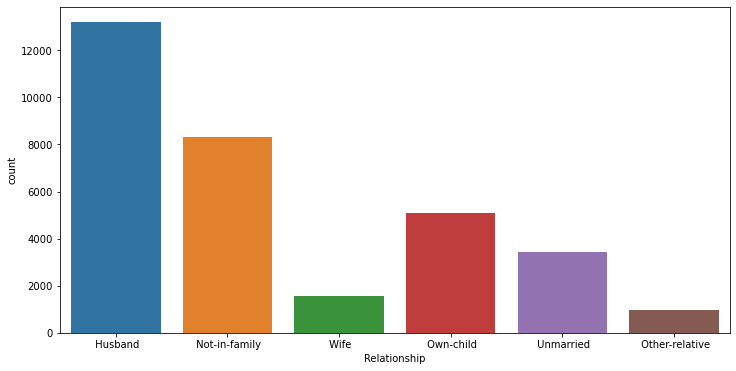



####################################################################################################


In [63]:
i=7
print('column name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

In above graph we can see 'Husband and Not-in-family ' have high value 

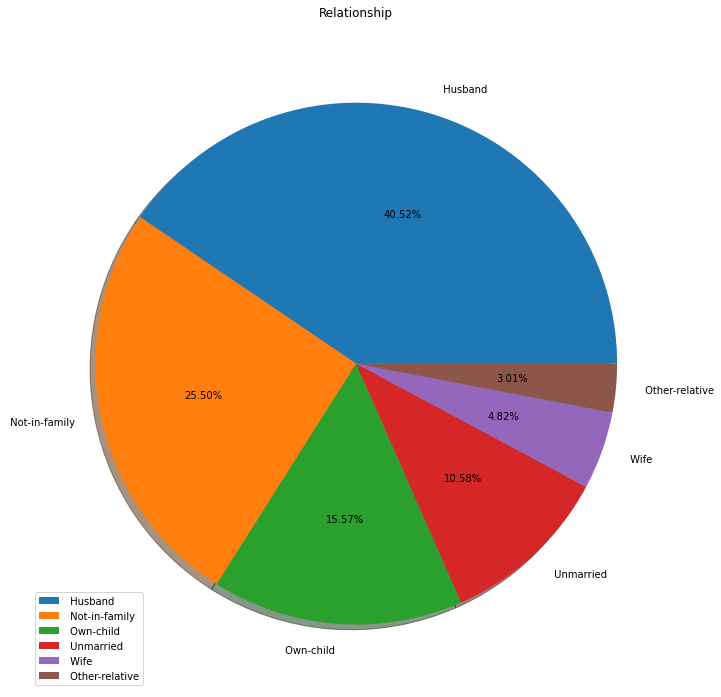

In [65]:
plt.figure(figsize=(20,12))
plt.pie(df['Relationship'].value_counts(), labels=df['Relationship'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Relationship\n')
plt.legend(prop={'size':10})
plt.show()

column name: Race


 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64


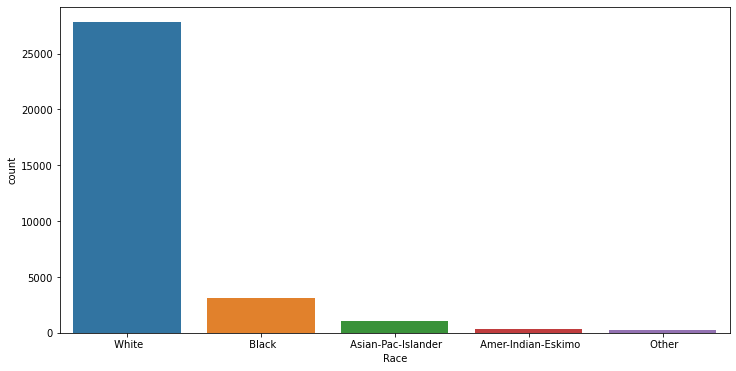



####################################################################################################


In [68]:
i =8
print('column name:',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

In Above Race column we can see high value present in "White"

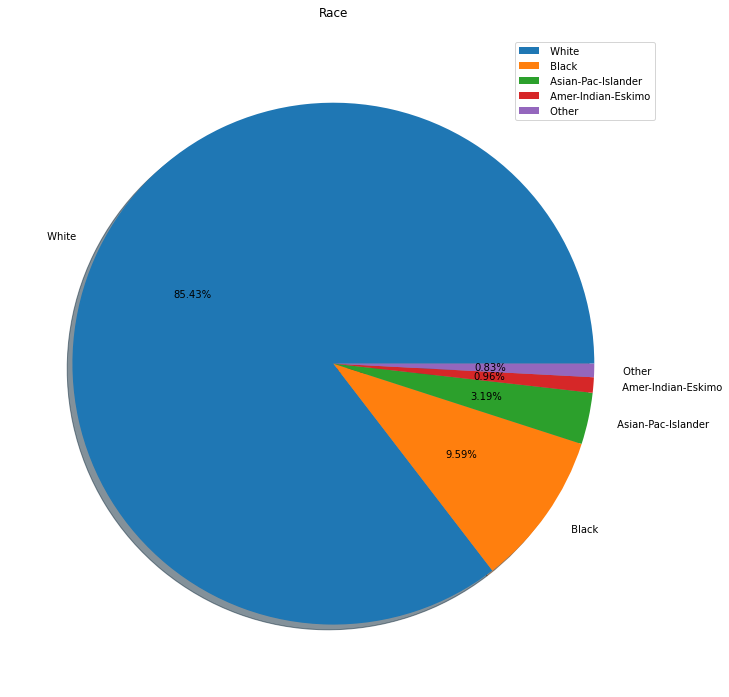

In [70]:
plt.figure(figsize=(20,12))
plt.pie(df['Race'].value_counts(),labels=df['Race'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Race\n')
plt.legend(prop={'size':10})
plt.show()

column name Sex


 Male      21789
 Female    10771
Name: Sex, dtype: int64


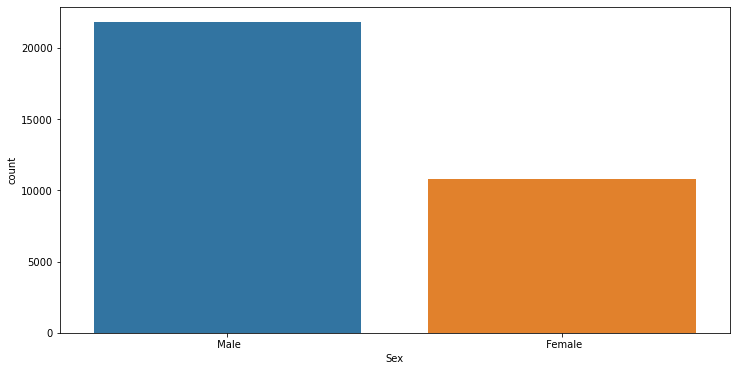



####################################################################################################


In [71]:
i = 9
print('column name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

In above graph we cann see that male are high

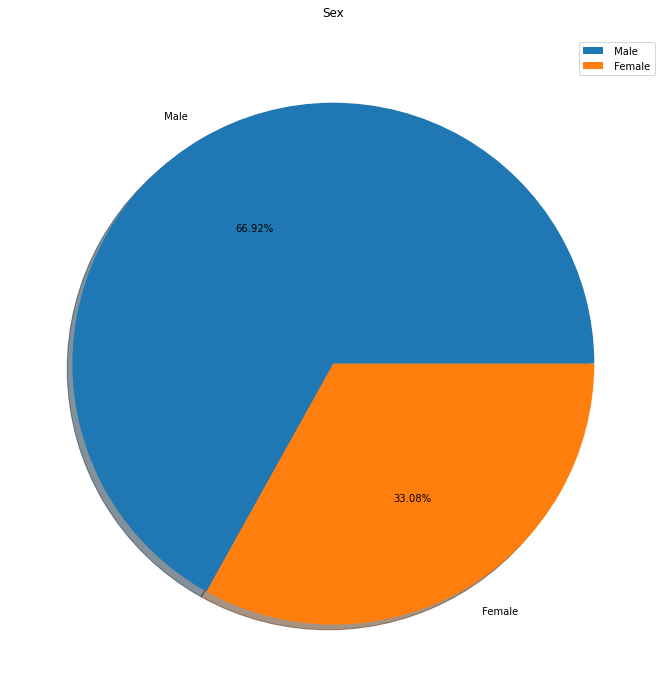

In [72]:
plt.figure(figsize=(20,12))
plt.pie(df['Sex'].value_counts(),labels=df['Sex'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Sex\n')
plt.legend(prop={'size':10})
plt.show()

column name  Native_country


 United-States                 29169
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru   

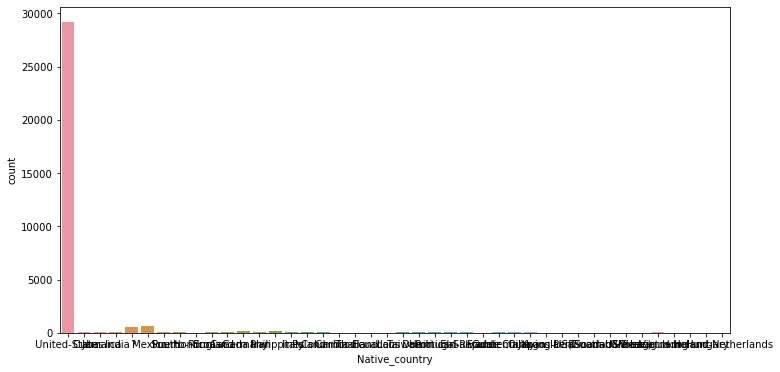



####################################################################################################


In [75]:
i = 13
print('column name ',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

we can see that in above graph only united have high value in Native_country column

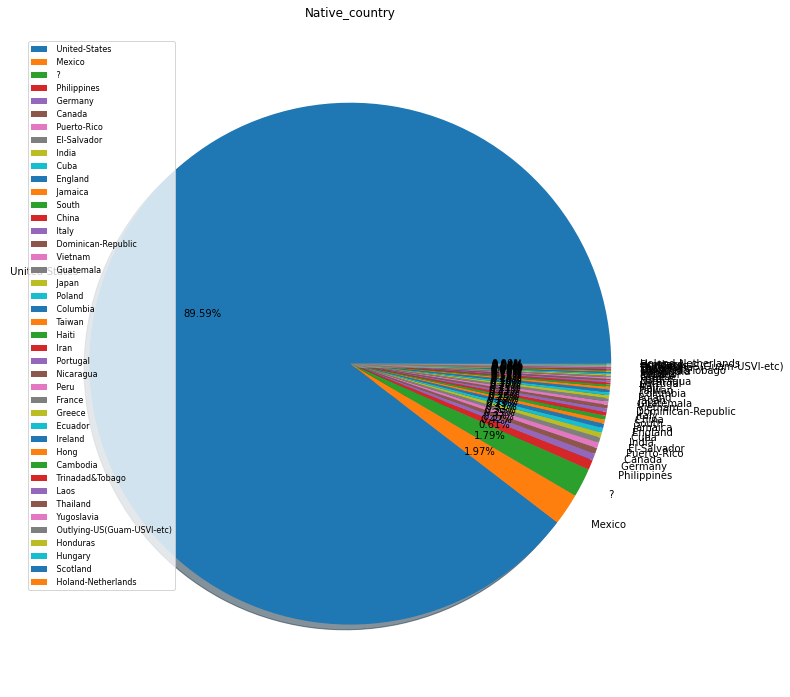

In [78]:
plt.figure(figsize=(20,12))
plt.pie(df['Native_country'].value_counts(),labels=df['Native_country'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Native_country\n')
plt.legend(prop={'size':8})
plt.show()

column name Income


 <=50K    24719
 >50K      7841
Name: Income, dtype: int64


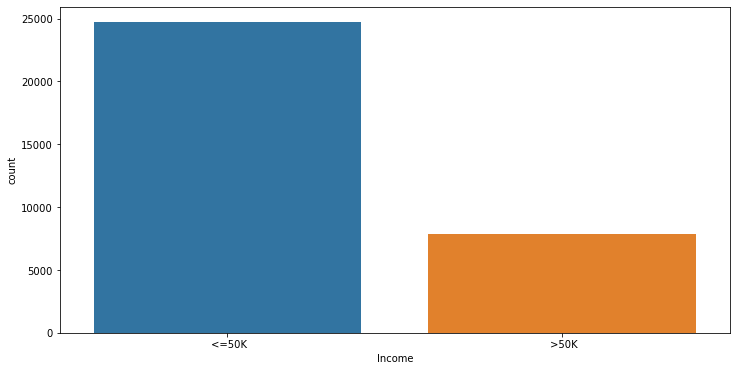



####################################################################################################


In [82]:
i=14
print('column name',df.columns[i])
print('\n')
print(df[df.columns[i]].value_counts())
plt.figure(figsize=(12,6))
sns.countplot(df[df.columns[i]])
plt.show()
print('\n')
print('#'*100)

we can see that in above graph that <=50k have high income 

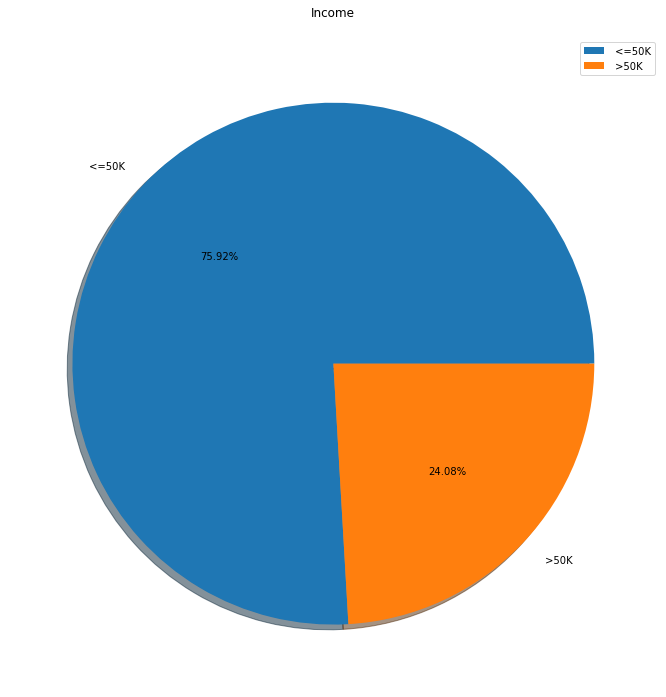

In [84]:
plt.figure(figsize=(20,12))
plt.pie(df['Income'].value_counts(),labels=df['Income'].value_counts().index,shadow=True,autopct='%1.2f%%')
plt.title('Income\n')
plt.legend(prop={'size':10})
plt.show()

And this is our target value looks like

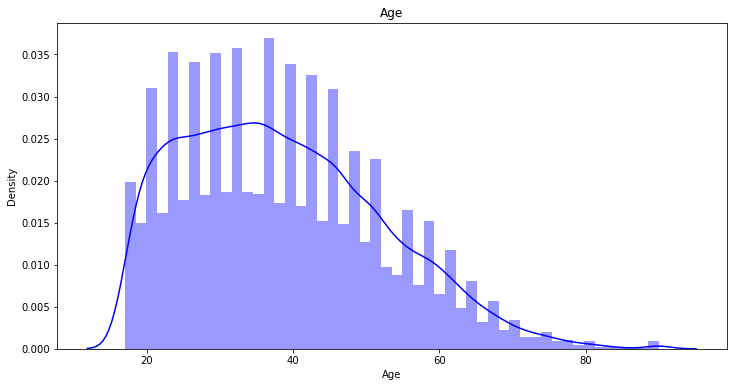

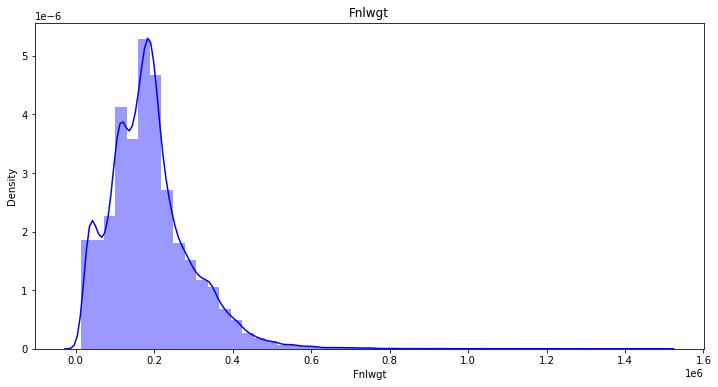

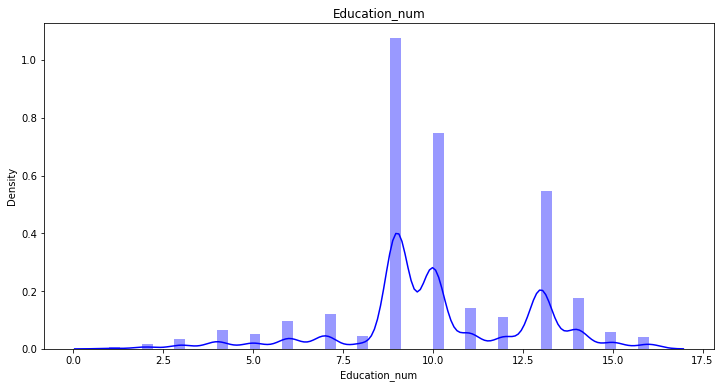

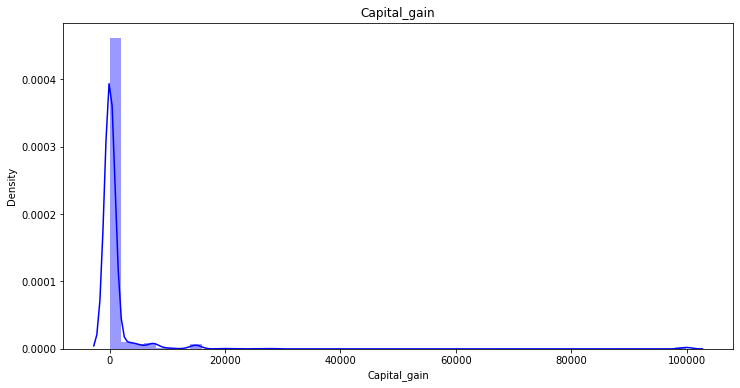

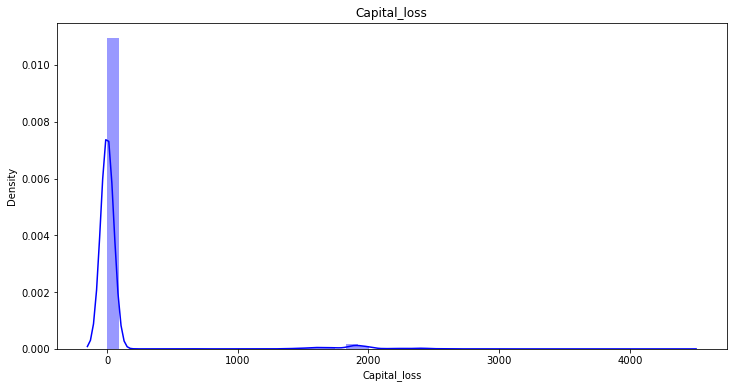

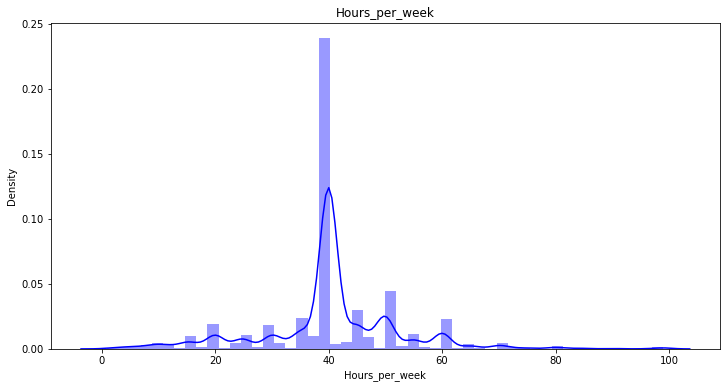

In [85]:
# Distribution of numerical columns
for i in df[numerical_columns]:
    plt.figure(figsize=(12,6))
    sns.distplot(df[i],color='b')
    plt.title(i)
    plt.show()

Positive Skewed columns:
1.Age
2.Fnlwgt
3.Capital_gain
4.Capital_loss
5.Hours_per_week

Negative Skewed columns:
1.Education_num

To get the best model accuracy we need to control this skewness

Text(0.5, 1.0, 'Age Distribution')

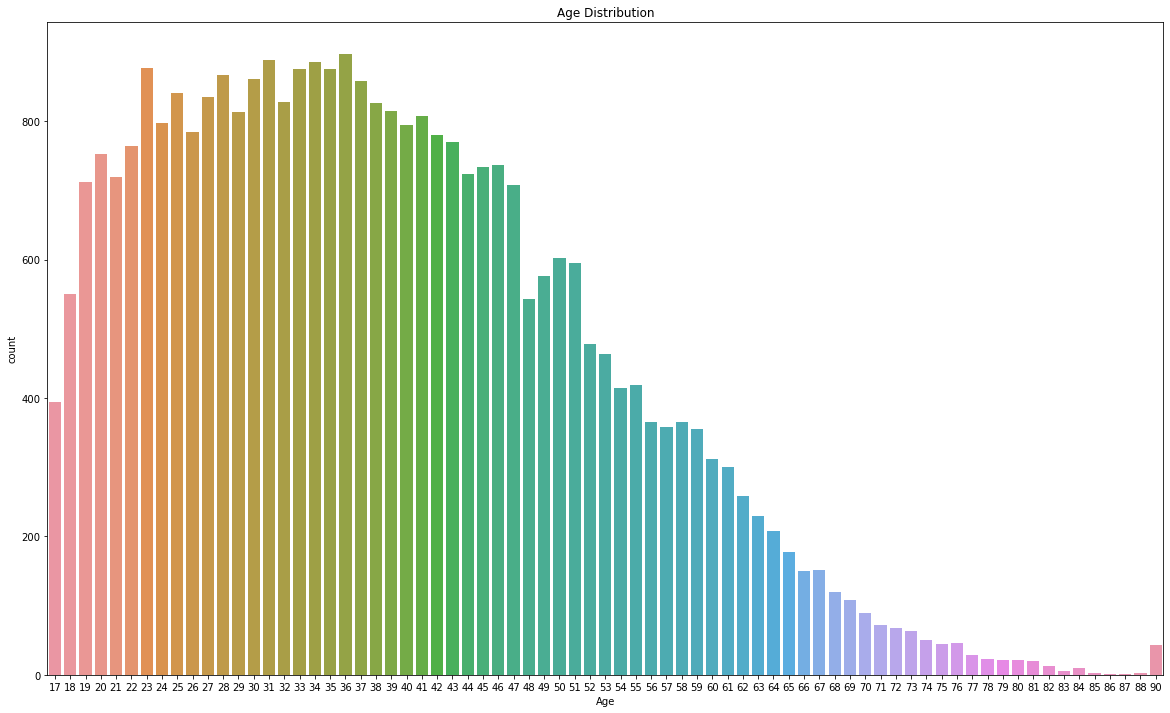

In [86]:
plt.figure(figsize=(20,12))
sns.countplot(df['Age'])
plt.title('Age Distribution')

we can see in age column between " 18 to 47" high value are present here and we can see the skewness also 

Text(0.5, 1.0, 'Fnlwgt distribution')

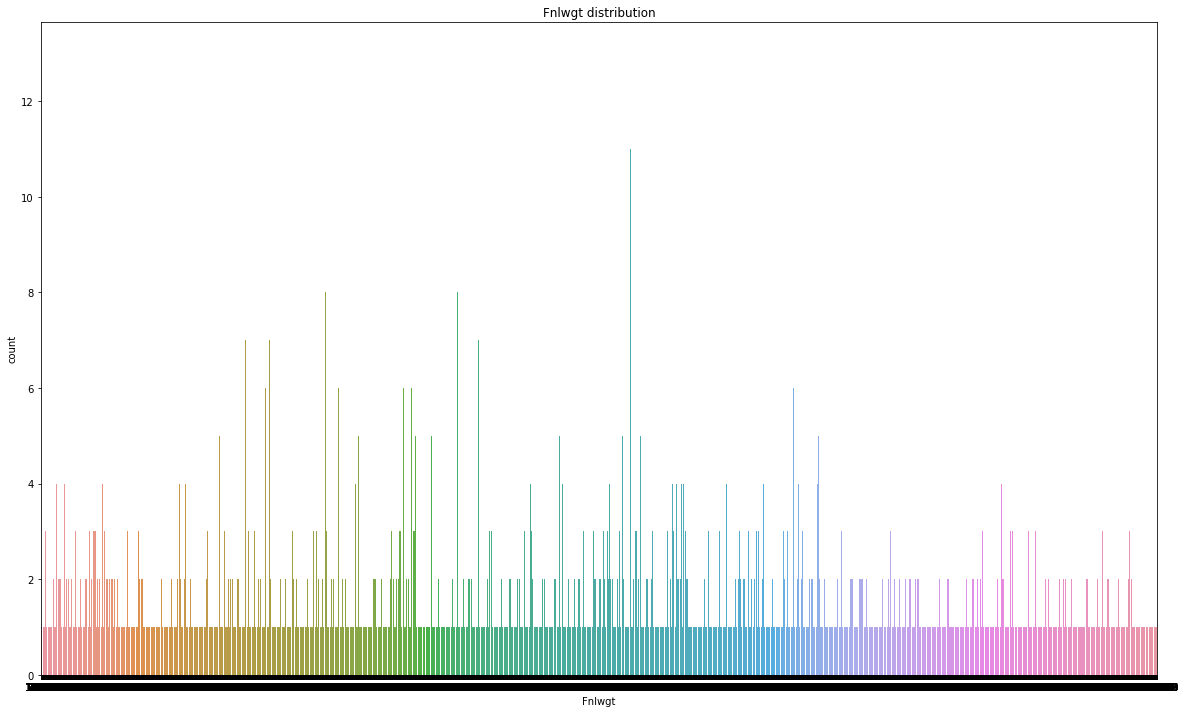

In [87]:
plt.figure(figsize=(20,12))
sns.countplot(df['Fnlwgt'])
plt.title('Fnlwgt distribution')

Text(0.5, 1.0, 'Capital_gain')

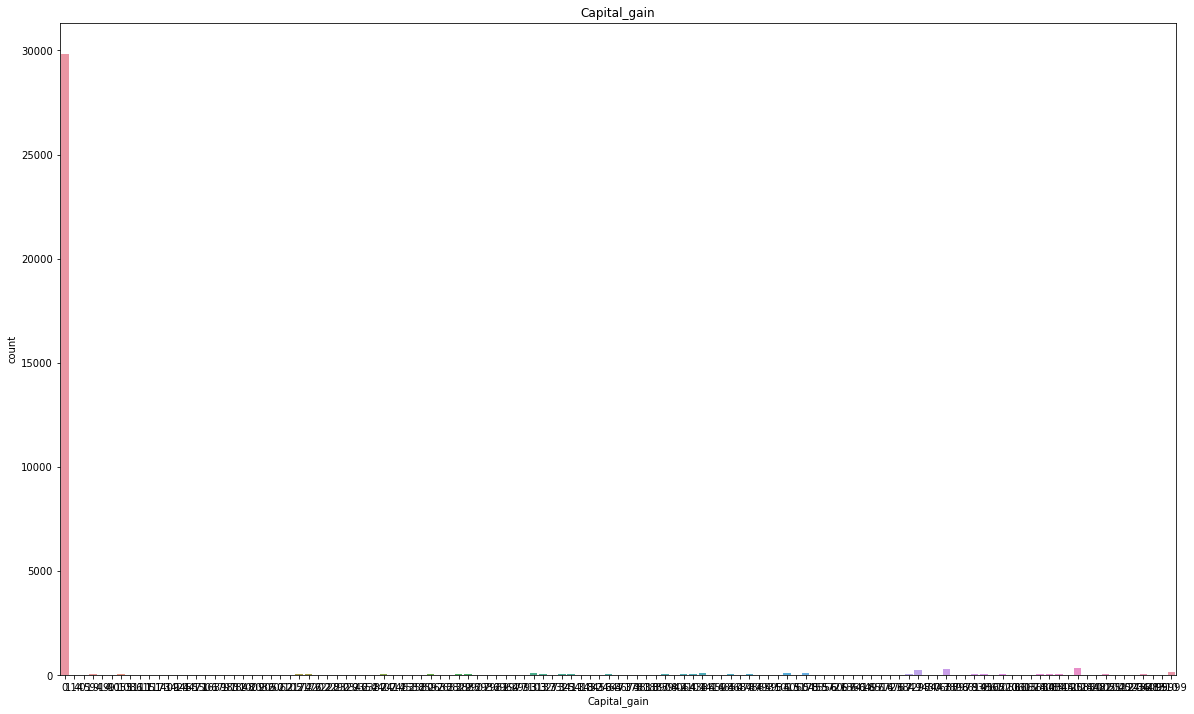

In [88]:
plt.figure(figsize=(20,12))
sns.countplot(df['Capital_gain'])
plt.title('Capital_gain')

Text(0.5, 1.0, 'Hours_per_week')

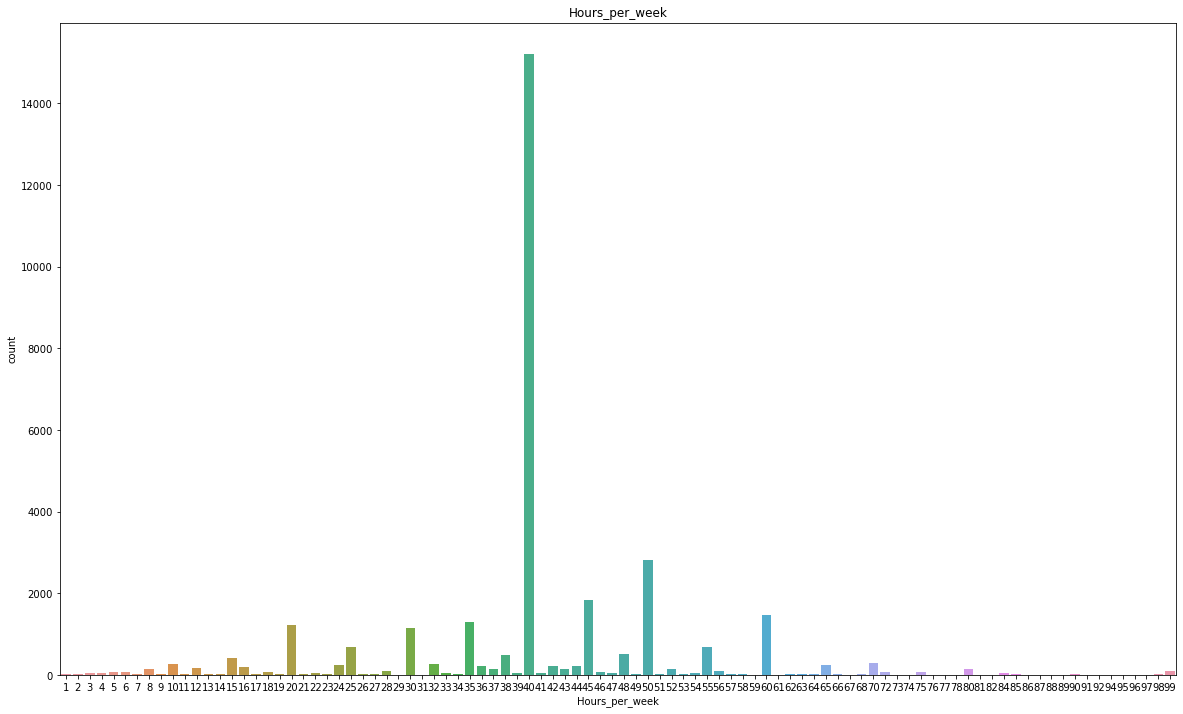

In [89]:
plt.figure(figsize=(20,12))
sns.countplot(df['Hours_per_week'])
plt.title('Hours_per_week')

Text(0.5, 1.0, 'Education_num')

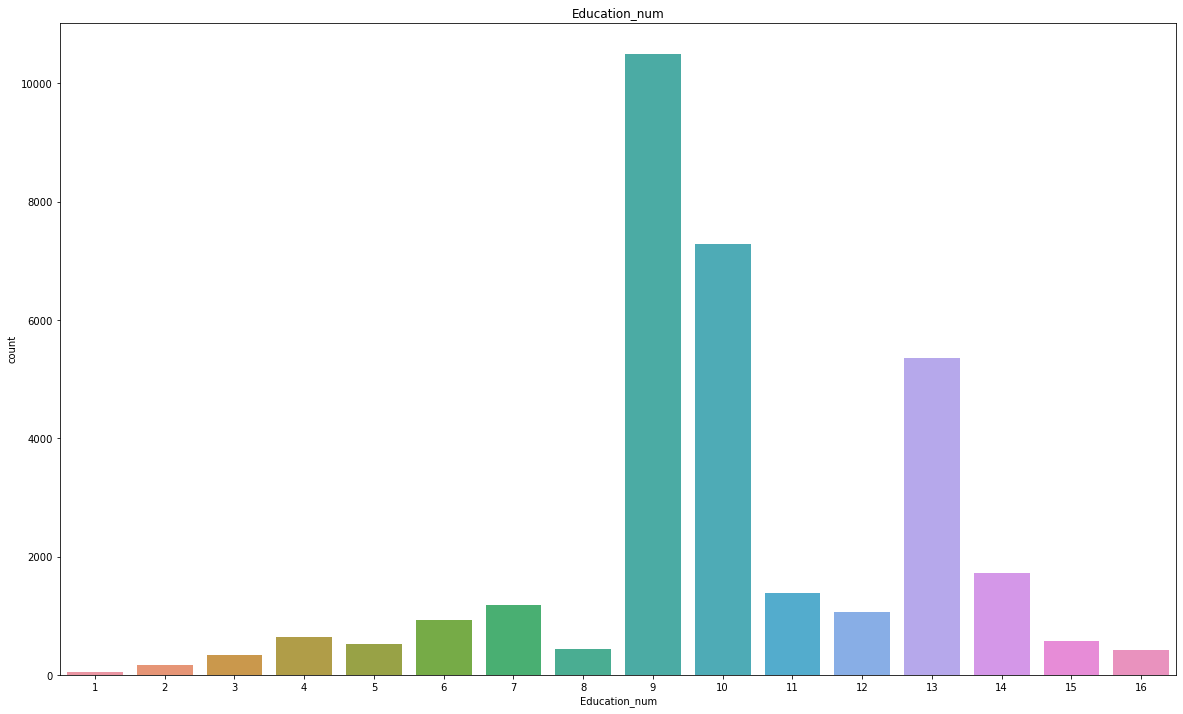

In [90]:
plt.figure(figsize=(20,12))
sns.countplot(df['Education_num'])
plt.title('Education_num')

Income Vs Workclass

Income Vs Workclass




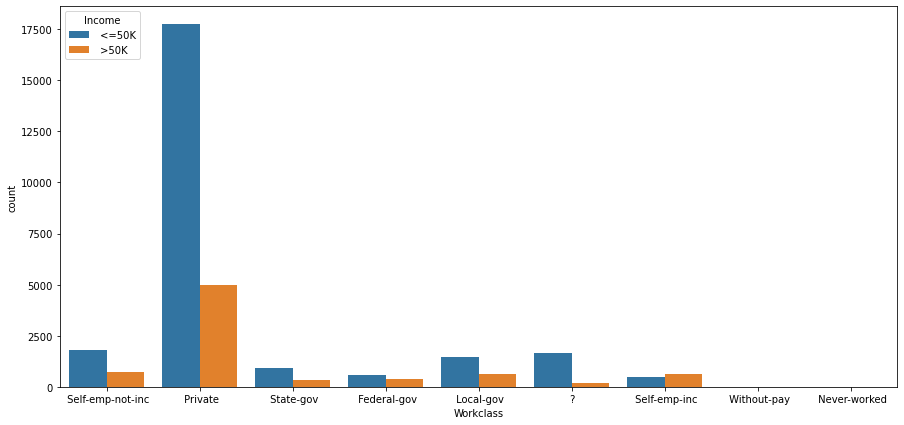

In [92]:
i=1
print("Income Vs",df.columns[i])
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[i]],hue=df['Income'])
print('\n')
plt.show()

Income Vs Education

Income Vs Education




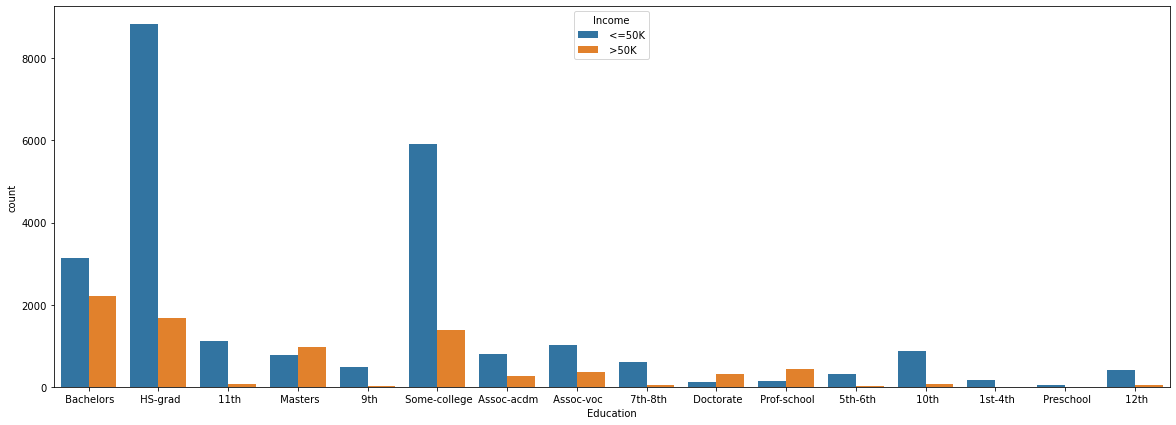

In [93]:
i=3
print("Income Vs",df.columns[i])
plt.figure(figsize=(20,7))
sns.countplot(df[df.columns[i]],hue=df['Income'])
print('\n')
plt.show()

Income Vs Marital_status

Income Vs Marital_status




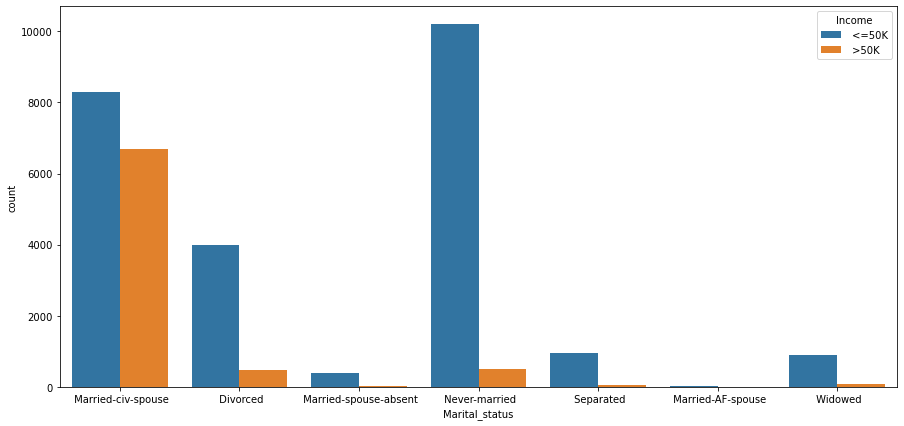

In [94]:
i=5
print("Income Vs",df.columns[i])
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[i]],hue=df['Income'])
print('\n')
plt.show()

Income Vs Occupation

Income Vs Occupation


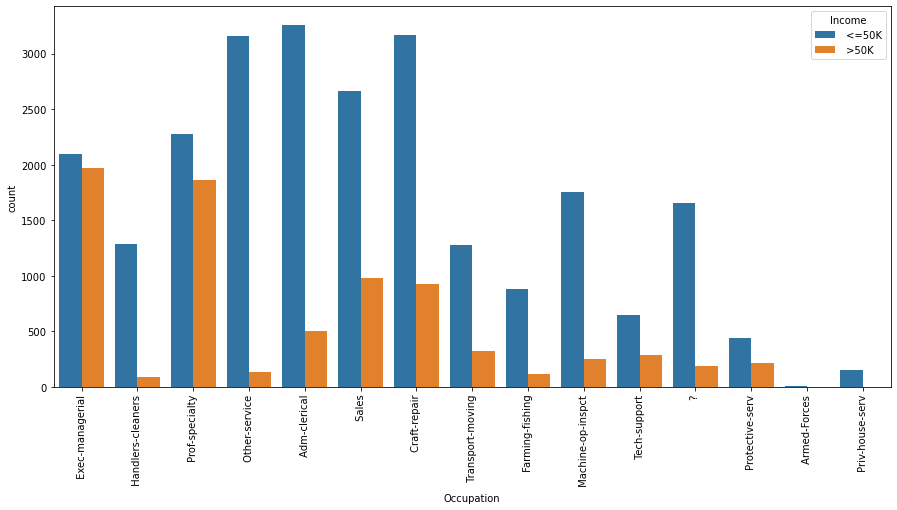

In [95]:
i=6
print("Income Vs",df.columns[i])
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[i]],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

Income Vs Relationship

Income Vs Relationship




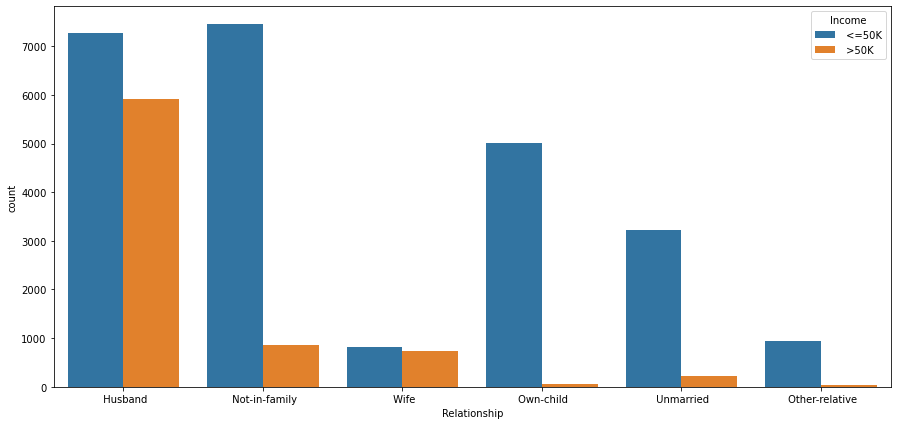

In [96]:
i=7
print("Income Vs",df.columns[i])
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[i]],hue=df['Income'])
print('\n')
plt.show()

Income Vs Race

Income Vs Race




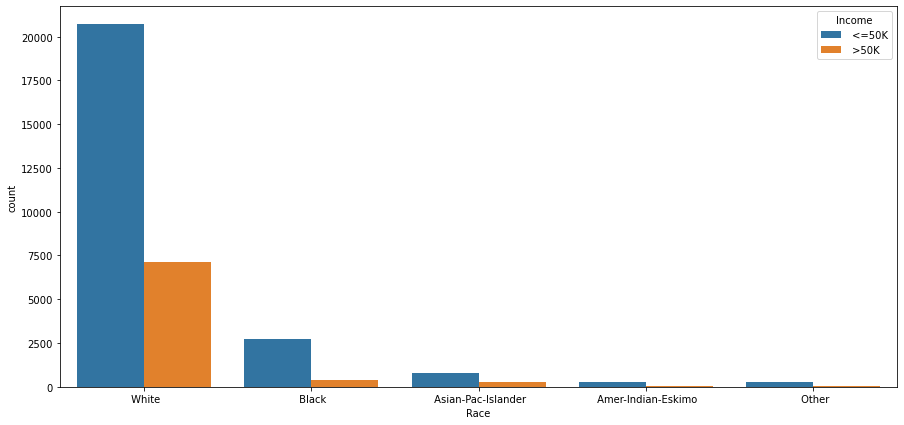

In [97]:
i=8
print("Income Vs",df.columns[i])
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[i]],hue=df['Income'])
print('\n')
plt.show()

Income Vs Sex

Income Vs Sex




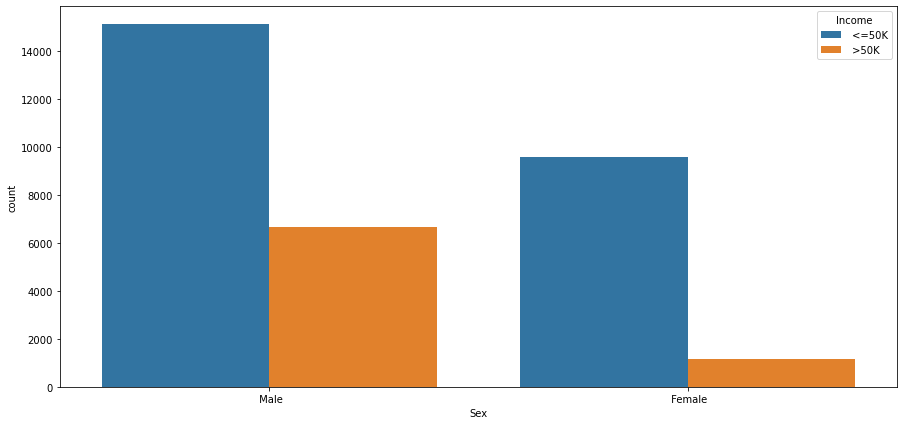

In [98]:
i=9
print("Income Vs",df.columns[i])
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[i]],hue=df['Income'])
print('\n')
plt.show()

Income Vs Native_country

Income Vs Native_country


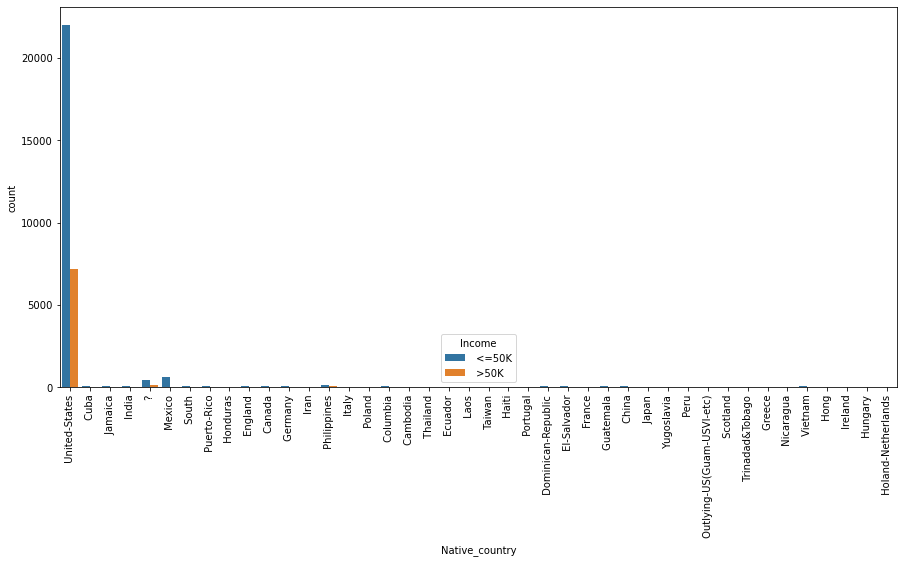

In [99]:
i=13
print("Income Vs",df.columns[i])
plt.figure(figsize=(15,7))
sns.countplot(df[df.columns[i]],hue=df['Income'])
plt.xticks(rotation=90)
plt.show()

Text(0.5, 1.0, 'Age vs Income Distribution')

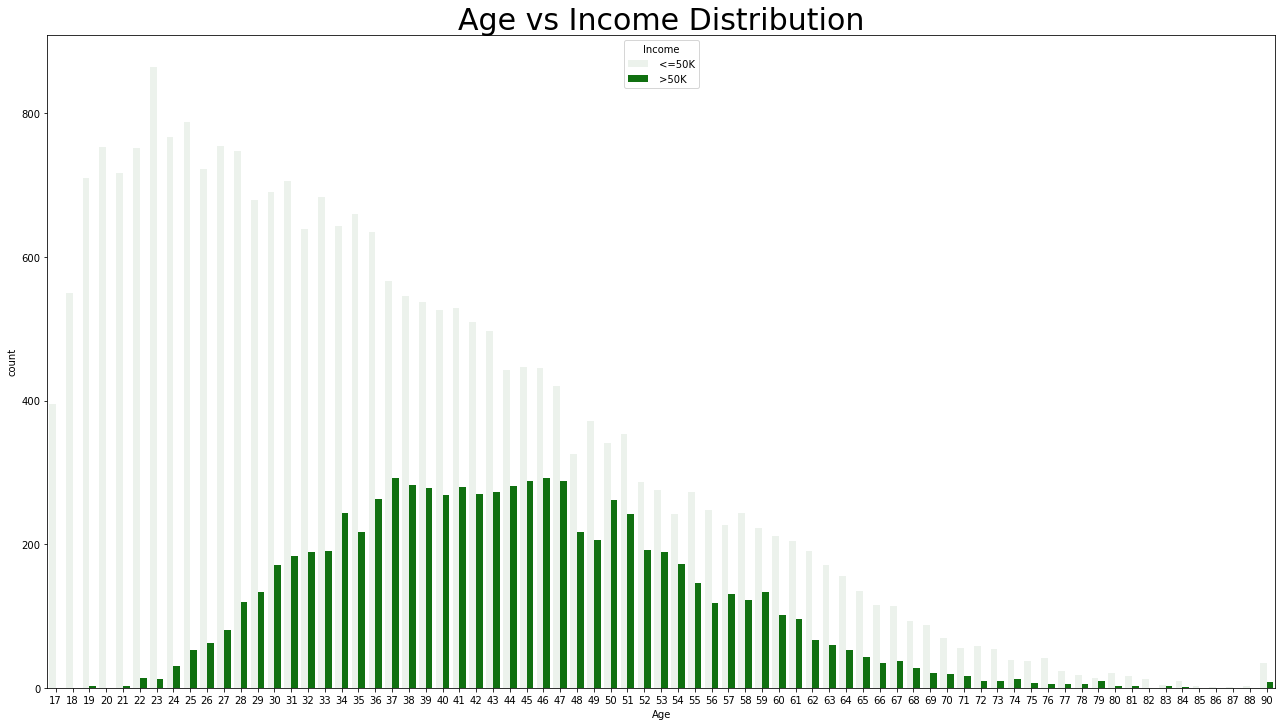

In [100]:
plt.figure(figsize=(22,12))
sns.countplot(df['Age'],hue=df['Income'],color='g')
plt.title('Age vs Income Distribution',fontdict={'fontsize':30})

More Peoples between 36 years to 47 years have earned more than 50K
Peoples started to earn at age 17, from 17 to 41 majority earn below 50k

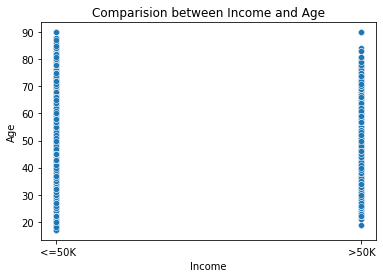

In [110]:
#visualizing the age of the people who have the income more
sns.scatterplot(df['Income'],df['Age'])
plt.title('Comparision between Income and Age')
plt.show()

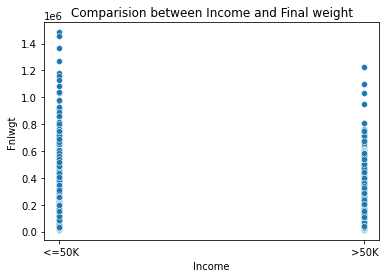

In [111]:
#visualizing the Final weight with income
sns.scatterplot(df['Income'],df['Fnlwgt'])
plt.title('Comparision between Income and Final weight')
plt.show()

<AxesSubplot:title={'center':'Comparision between Age and Fnlwgt'}, xlabel='Age', ylabel='Fnlwgt'>

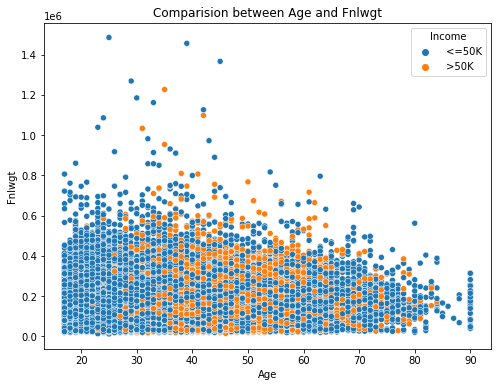

In [112]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Fnlwgt')
sns.scatterplot(df['Age'],df['Fnlwgt'],hue=df["Income"])

<AxesSubplot:title={'center':'Comparision between Education_num and Age'}, xlabel='Education_num', ylabel='Age'>

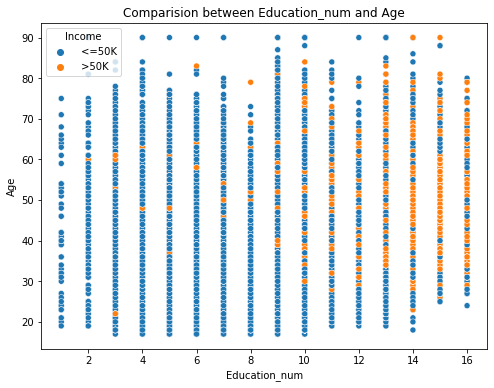

In [113]:
#Comparision between features using scatter plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Education_num and Age')
sns.scatterplot(df['Education_num'],df['Age'],hue=df["Income"])

<AxesSubplot:title={'center':'Comparision between Age and Education_num'}, xlabel='Age', ylabel='Education_num'>

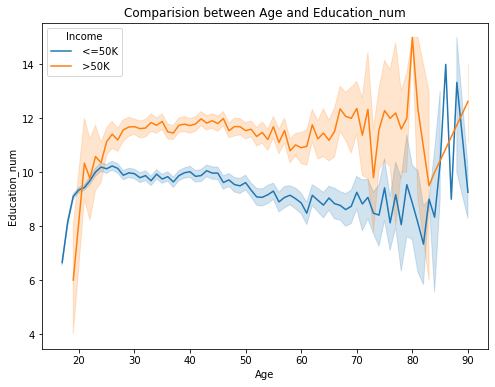

In [114]:
#Comparision between features using line plot
plt.figure(figsize=[8,6])
plt.title('Comparision between Age and Education_num')
sns.lineplot(df['Age'],df['Education_num'],hue=df["Income"])

Multivariate Analysis:

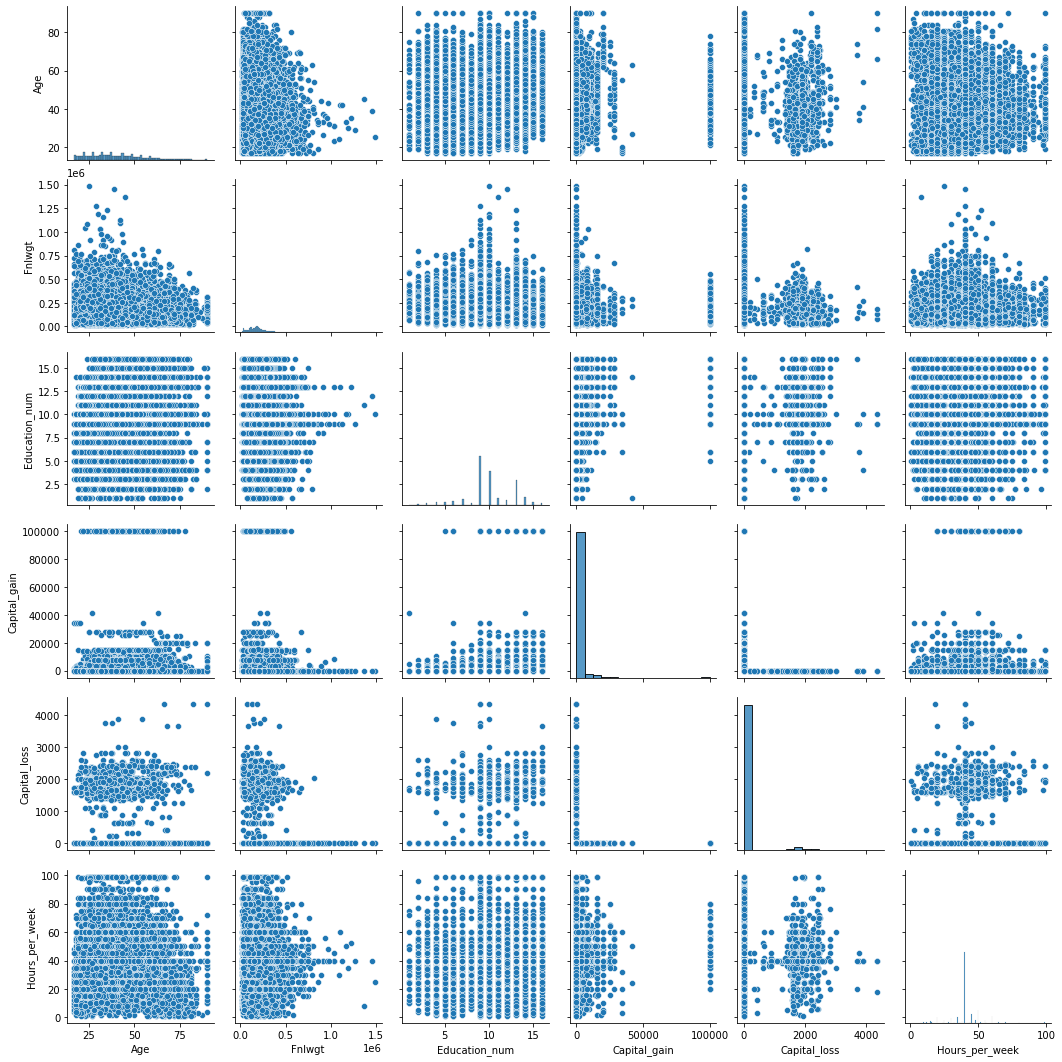

In [115]:
sns.pairplot(df)

This pair plot gives the pairwise relation between the columns which is plotted on the basis of target variable 'Income'. Here we can observe the relation between the features and label. Most of features are highly correlated with each other. Some of the features have outliers and skewness , will remove them later.

Now checking skewness

In [116]:
df.skew()

Age                0.558738
Fnlwgt             1.446972
Education_num     -0.311630
Capital_gain      11.953690
Capital_loss       4.594549
Hours_per_week     0.227636
dtype: float64

we can see that very high skewness in "capital_gain"

In [118]:
df.corr()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
Age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
Fnlwgt,-0.076646,1.000000,-0.043159,0.000437,-0.010259,-0.018770
Education_num,0.036527,-0.043159,1.000000,0.122627,0.079932,0.148127
Capital_gain,0.077674,0.000437,0.122627,1.000000,-0.031614,0.078409
Capital_loss,0.057775,-0.010259,0.079932,-0.031614,1.000000,0.054256
Hours_per_week,0.068756,-0.018770,0.148127,0.078409,0.054256,1.000000


<AxesSubplot:>

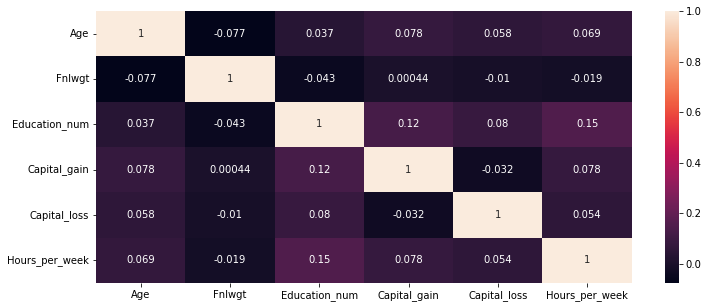

In [119]:
#checking corrleation using heatmap
plt.figure(figsize=(12,5))
sns.heatmap(df.corr(),annot=True)

Checking VIF score

In [120]:
numerical_columns

['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']

In [121]:
p=df[['Age',
 'Fnlwgt',
 'Education_num',
 'Capital_gain',
 'Capital_loss',
 'Hours_per_week']]

In [122]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
#define a function to calculate VIF score
def vif_clac():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(p.values,i) for i in range(p.shape[1])]
    vif["features"]=p.columns
    print(vif)

In [124]:
vif_clac()

   VIF Factor        features
0    7.246276             Age
1    3.683279          Fnlwgt
2   10.983337   Education_num
3    1.032984    Capital_gain
4    1.056818    Capital_loss
5    9.757850  Hours_per_week


we see that VIF score of "Education_num" column is high.so,we drop this column from the DataFrame.

In [125]:
#droping "Education_num"
df=df.drop("Education_num",axis=1)

In [126]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


# LabelEncoding:
our Dataframe has many non Numeric column.Now we convert this non Numeric column into numeric column by LabelEncoding

In [127]:
df.nunique().to_frame('unique values')

,unique values
Age,73
Workclass,9
Fnlwgt,21647
Education,16
Marital_status,7
Occupation,15
Relationship,6
Race,5
Sex,2
Capital_gain,119


In [128]:
list=['Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Capital_gain','Capital_loss','Income','Native_country']

In [129]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in list:
    df[i]=le.fit_transform(df[i]).astype(float)

In [130]:
df.head()

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13,39.0,0.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40,39.0,0.0
2,53,4.0,234721,1.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40,39.0,0.0
3,28,4.0,338409,9.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40,5.0,0.0
4,37,4.0,284582,12.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40,39.0,0.0


Checking Outliers 

In [131]:
index_n

[0, 2, 4, 10, 11, 12]

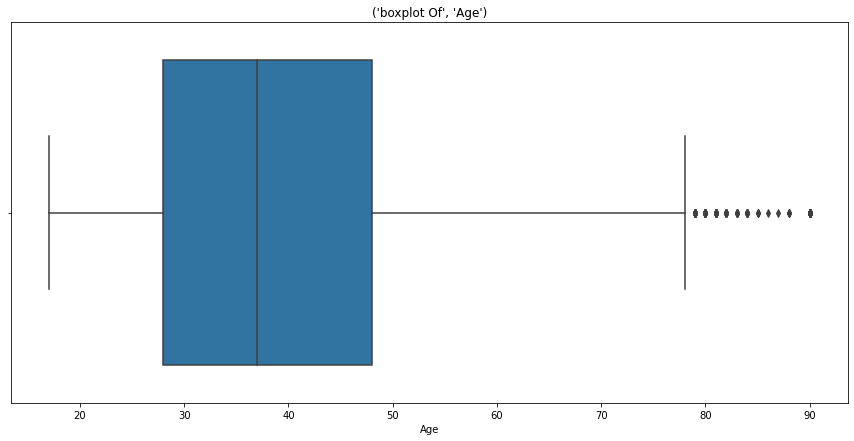

In [132]:
i=0
p=("boxplot Of",df.columns[i])
plt.figure(figsize=(15,7))
plt.title(p,loc='center')
sns.boxplot(df[df.columns[i]])
print('\n')
plt.show()

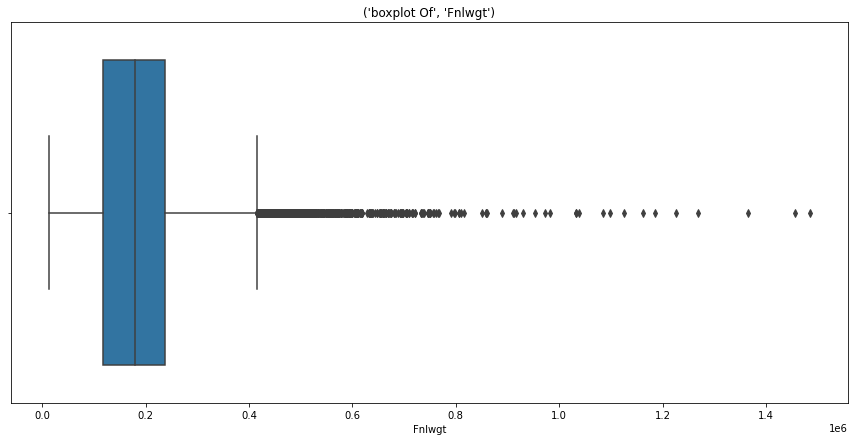

In [133]:
i=2
p=("boxplot Of",df.columns[i])
plt.figure(figsize=(15,7))
plt.title(p,loc='center')
sns.boxplot(df[df.columns[i]])
print('\n')
plt.show()

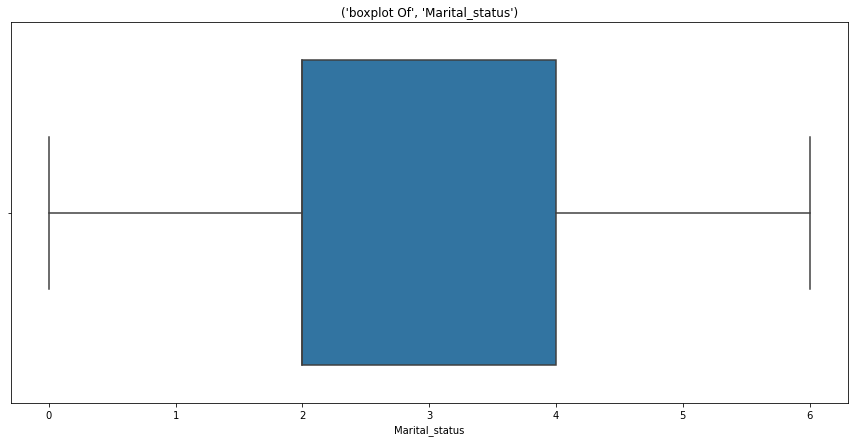

In [134]:
i=4
p=("boxplot Of",df.columns[i])
plt.figure(figsize=(15,7))
plt.title(p,loc='center')
sns.boxplot(df[df.columns[i]])
print('\n')
plt.show()

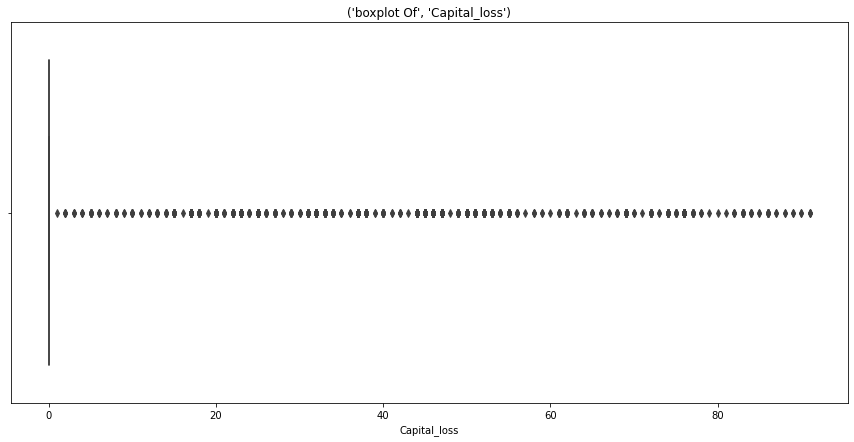

In [135]:
i=10
p=("boxplot Of",df.columns[i])
plt.figure(figsize=(15,7))
plt.title(p,loc='center')
sns.boxplot(df[df.columns[i]])
print('\n')
plt.show()

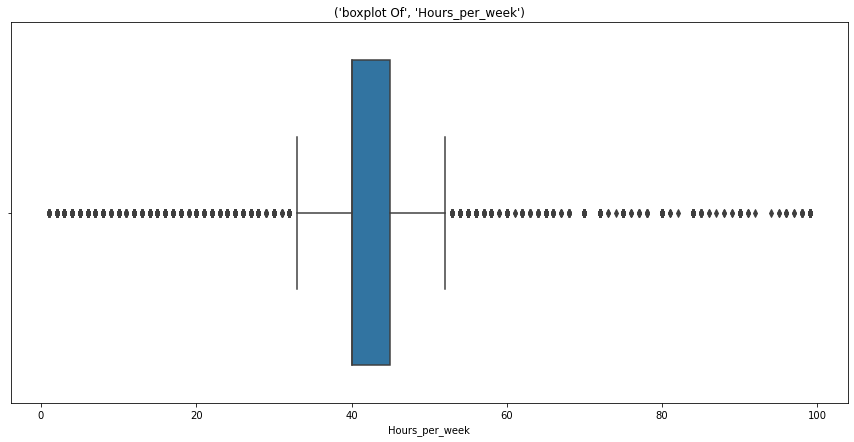

In [136]:
i=11
p=("boxplot Of",df.columns[i])
plt.figure(figsize=(15,7))
plt.title(p,loc='center')
sns.boxplot(df[df.columns[i]])
print('\n')
plt.show()

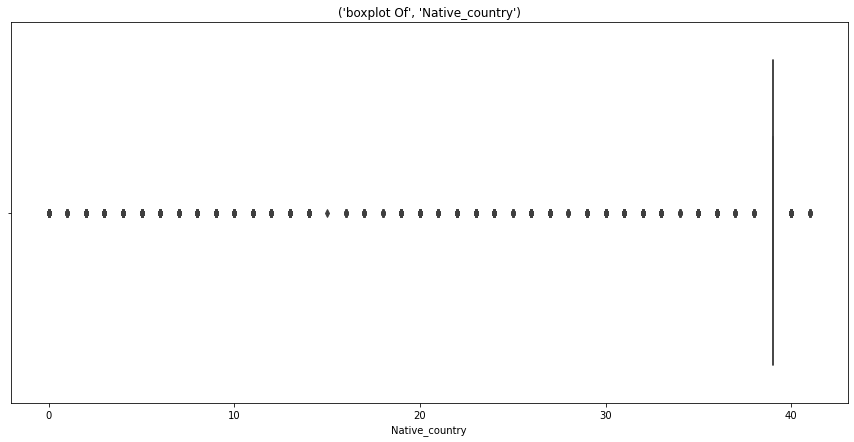

In [137]:
i=12
p=("boxplot Of",df.columns[i])
plt.figure(figsize=(15,7))
plt.title(p,loc='center')
sns.boxplot(df[df.columns[i]])
print('\n')
plt.show()

Remove The Outliers From The DataFrame By Zscore:

In [138]:
from scipy.stats import zscore

In [139]:
outliers_columns=df[['Age','Fnlwgt','Hours_per_week']]

In [140]:
z=np.abs(zscore(outliers_columns))
z

,Age,Fnlwgt,Hours_per_week
0,0.837097,1.008742,2.222120
1,0.042640,0.245046,0.035430
2,1.057031,0.425770,0.035430
3,0.775755,1.408146,0.035430
4,0.115952,0.898170,0.035430
...,...,...,...
32555,0.849066,0.639710,0.197407
32556,0.103982,0.335466,0.035430
32557,1.423589,0.358811,0.035430
32558,1.215624,0.110927,1.655200


In [141]:
threshold=3
print(np.where(z>3))

(array([    9,    27,    36,    39,    76,   156,   181,   188,   191,
         214,   221,   229,   271,   298,   311,   413,   429,   507,
         519,   588,   650,   826,   913,   917,   934,   962,  1011,
        1033,  1035,  1039,  1063,  1065,  1150,  1167,  1171,  1199,
        1261,  1271,  1290,  1313,  1410,  1416,  1453,  1457,  1499,
        1596,  1683,  1729,  1823,  1846,  1882,  1886,  1928,  1934,
        1970,  1986,  2014,  2064,  2302,  2332,  2341,  2346,  2357,
        2368,  2398,  2428,  2443,  2593,  2674,  2753,  2759,  2760,
        2769,  2823,  2849,  2890,  2899,  2905,  2919,  2931,  2935,
        2958,  2962,  2976,  3091,  3192,  3210,  3224,  3290,  3301,
        3302,  3342,  3408,  3501,  3536,  3568,  3570,  3577,  3611,
        3718,  3737,  3743,  3746,  3748,  3772,  3776,  3869,  3905,
        3908,  3962,  3963,  3982,  4059,  4069,  4085,  4090,  4100,
        4108,  4123,  4235,  4277,  4293,  4307,  4311,  4336,  4347,
        4440,  4567

In [142]:
df_new=df[(z<3).all(axis=1)]
df_new

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6.0,83311,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13,39.0,0.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40,39.0,0.0
2,53,4.0,234721,1.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40,39.0,0.0
3,28,4.0,338409,9.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40,5.0,0.0
4,37,4.0,284582,12.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,2.0,13.0,5.0,4.0,0.0,0.0,0.0,38,39.0,0.0
32556,40,4.0,154374,11.0,2.0,7.0,0.0,4.0,1.0,0.0,0.0,40,39.0,1.0
32557,58,4.0,151910,11.0,6.0,1.0,4.0,4.0,0.0,0.0,0.0,40,39.0,0.0
32558,22,4.0,201490,11.0,4.0,1.0,3.0,4.0,1.0,0.0,0.0,20,39.0,0.0


In [143]:
print(df.shape)
print(df_new.shape)

(32560, 14)
(31668, 14)


In [144]:
percentage_of_dataloss=((32560-31668)/32560)*100
print("percentage of dataloss =",percentage_of_dataloss)

percentage of dataloss = 2.7395577395577395


Dividing data in features and label

In [145]:
x=df_new.iloc[:,0:13] #Independent variable
y=df_new.iloc[:,-1] #Dependent variable

In [146]:
x

,Age,Workclass,Fnlwgt,Education,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,50,6.0,83311,9.0,2.0,4.0,0.0,4.0,1.0,0.0,0.0,13,39.0
1,38,4.0,215646,11.0,0.0,6.0,1.0,4.0,1.0,0.0,0.0,40,39.0
2,53,4.0,234721,1.0,2.0,6.0,0.0,2.0,1.0,0.0,0.0,40,39.0
3,28,4.0,338409,9.0,2.0,10.0,5.0,2.0,0.0,0.0,0.0,40,5.0
4,37,4.0,284582,12.0,2.0,4.0,5.0,4.0,0.0,0.0,0.0,40,39.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,4.0,257302,7.0,2.0,13.0,5.0,4.0,0.0,0.0,0.0,38,39.0
32556,40,4.0,154374,11.0,2.0,7.0,0.0,4.0,1.0,0.0,0.0,40,39.0
32557,58,4.0,151910,11.0,6.0,1.0,4.0,4.0,0.0,0.0,0.0,40,39.0
32558,22,4.0,201490,11.0,4.0,1.0,3.0,4.0,1.0,0.0,0.0,20,39.0


In [147]:
y

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
32555    0.0
32556    1.0
32557    0.0
32558    0.0
32559    1.0
Name: Income, Length: 31668, dtype: float64

# oversampling

In [148]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()

In [149]:
x,y= smt.fit_resample(x,y)

In [151]:
x.value_counts()

Age  Workclass  Fnlwgt  Education  Marital_status  Occupation  Relationship  Race  Sex  Capital_gain  Capital_loss  Hours_per_week  Native_country
25   4.0        195994  3.0        4.0             9.0         1.0           4.0   0.0  0.0           0.0           40              13.0              3
42   4.0        204235  15.0       2.0             10.0        0.0           4.0   1.0  0.0           0.0           40              39.0              3
44   4.0        367749  9.0        4.0             10.0        1.0           4.0   0.0  0.0           0.0           45              26.0              2
39   4.0        138192  9.0        2.0             3.0         0.0           4.0   1.0  0.0           0.0           40              39.0              2
19   4.0        146679  15.0       4.0             4.0         3.0           2.0   1.0  0.0           0.0           30              39.0              2
                                                                                             

In [152]:
y.value_counts()

0.0    24055
1.0    24055
Name: Income, dtype: int64

Transforming data to remove skewness

In [154]:
from sklearn.preprocessing import power_transform
x = power_transform(x,method='yeo-johnson')
x

array([[ 0.82672332,  1.72769374, -1.11771255, ..., -0.30997283,
        -2.44076884,  0.34993339],
       [-0.1163333 , -0.01241573,  0.43011982, ..., -0.30997283,
        -0.21159865,  0.34993339],
       [ 1.04759555, -0.01241573,  0.61130252, ..., -0.30997283,
        -0.21159865,  0.34993339],
       ...,
       [ 0.28939087, -0.01241573,  1.68791666, ..., -0.30997283,
         1.47996971,  0.34993339],
       [ 0.97454748, -0.01241573, -0.2815846 , ..., -0.30997283,
         1.82152755,  0.34993339],
       [ 0.04839161, -0.01241573,  0.0305411 , ..., -0.30997283,
        -0.11276484,  0.34993339]])

In [155]:
#print skewness after power transform
df_new1=pd.DataFrame(x)
df_new1.skew()

0    -0.033955
1     0.095325
2    -0.032024
3    -0.205339
4     0.002865
5    -0.174872
6     0.286134
7    -2.016442
8    -0.949392
9     1.886427
10    2.919479
11    0.138063
12   -2.571546
dtype: float64

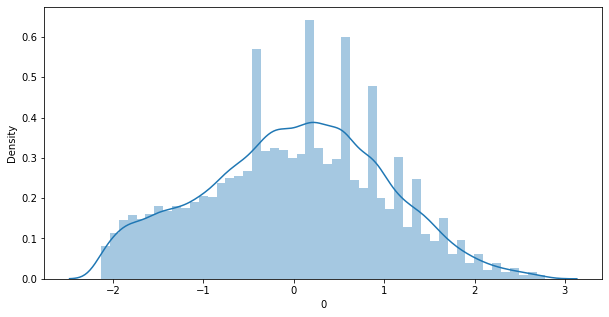

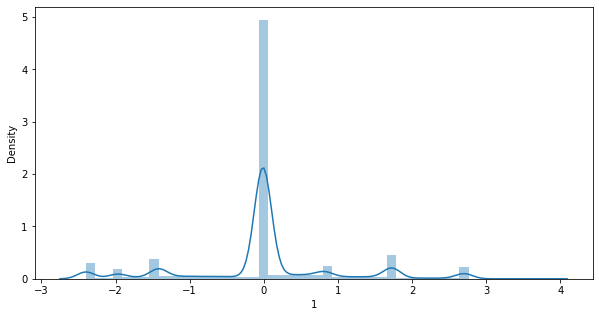

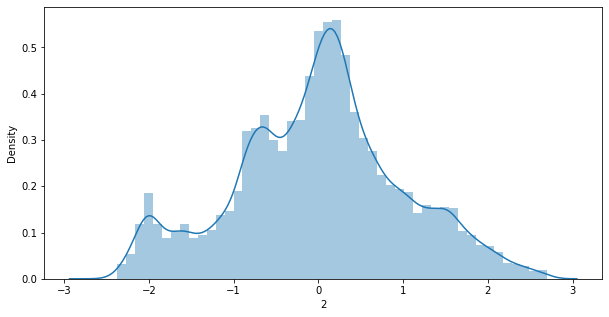

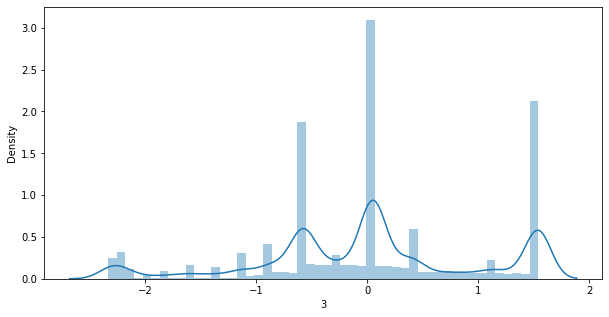

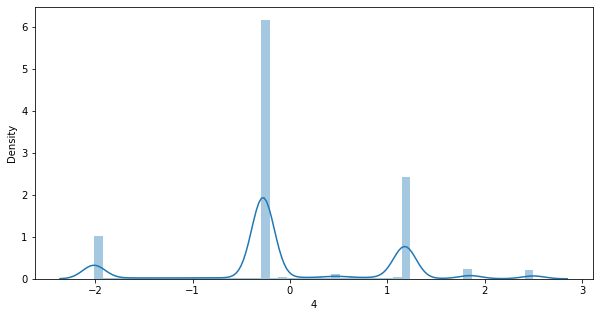

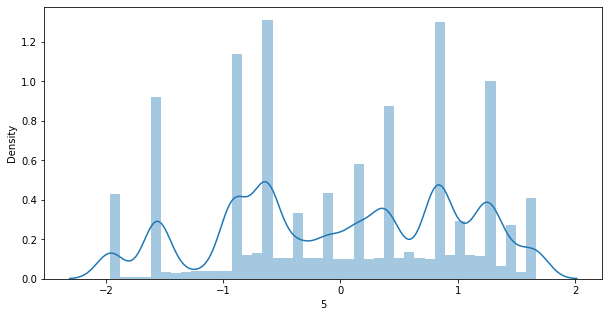

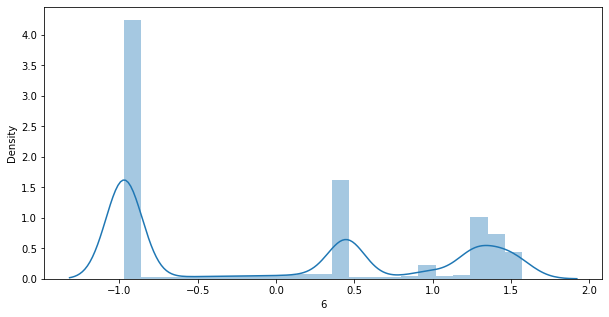

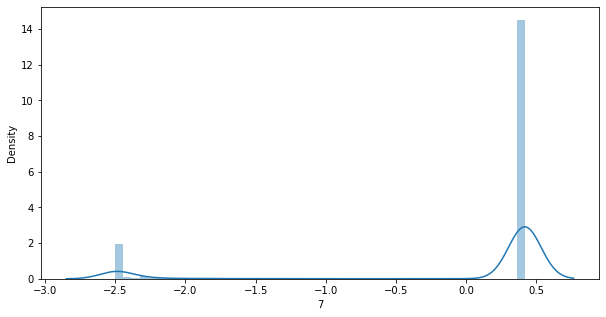

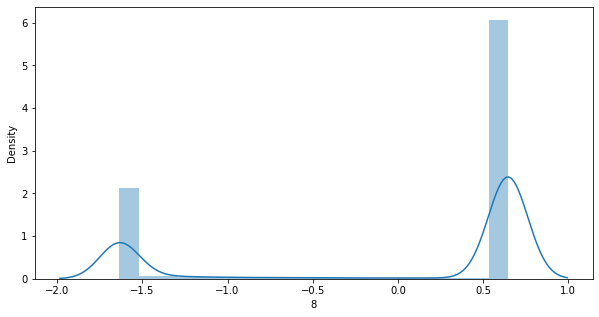

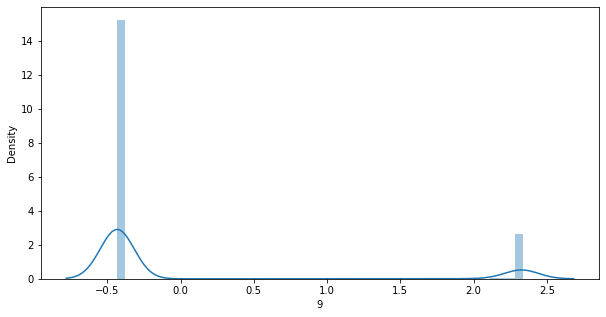

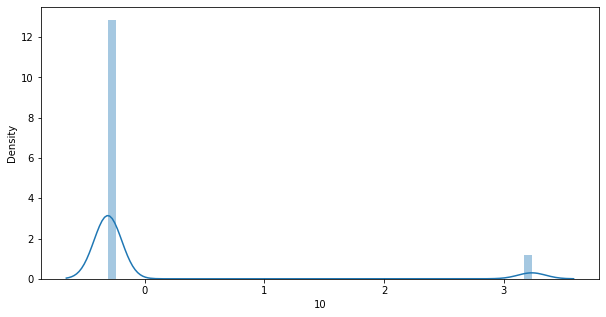

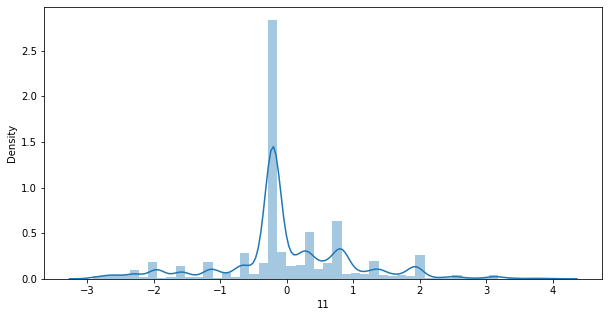

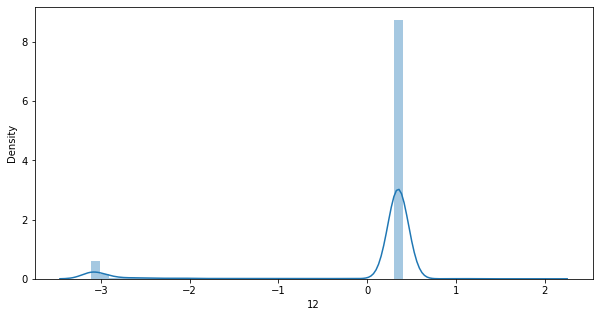

In [156]:
for i in range(13):
    plt.figure(figsize=(10,5))
    sns.distplot(df_new1[df_new1.columns[i]])
    
    plt.show()

In [157]:
index_n

[0, 2, 4, 10, 11, 12]

In [158]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.82672332,  1.72769374, -1.11771255, ..., -0.30997283,
        -2.44076884,  0.34993339],
       [-0.1163333 , -0.01241573,  0.43011982, ..., -0.30997283,
        -0.21159865,  0.34993339],
       [ 1.04759555, -0.01241573,  0.61130252, ..., -0.30997283,
        -0.21159865,  0.34993339],
       ...,
       [ 0.28939087, -0.01241573,  1.68791666, ..., -0.30997283,
         1.47996971,  0.34993339],
       [ 0.97454748, -0.01241573, -0.2815846 , ..., -0.30997283,
         1.82152755,  0.34993339],
       [ 0.04839161, -0.01241573,  0.0305411 , ..., -0.30997283,
        -0.11276484,  0.34993339]])

In [159]:
#print skewness
df_new2=pd.DataFrame(x)
df_new2.skew()


0    -0.033955
1     0.095325
2    -0.032024
3    -0.205339
4     0.002865
5    -0.174872
6     0.286134
7    -2.016442
8    -0.949392
9     1.886427
10    2.919479
11    0.138063
12   -2.571546
dtype: float64

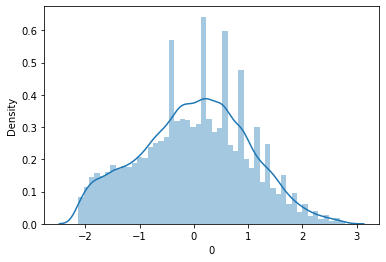

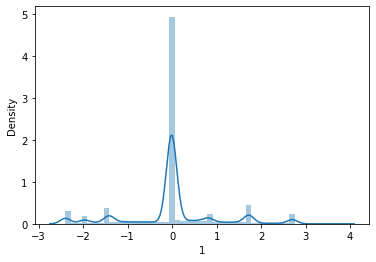

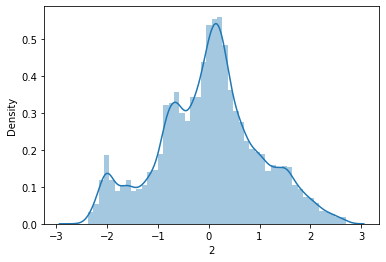

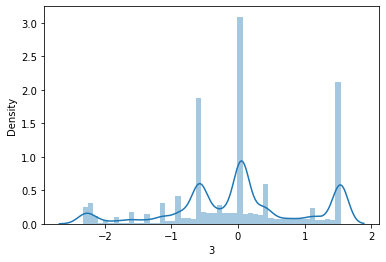

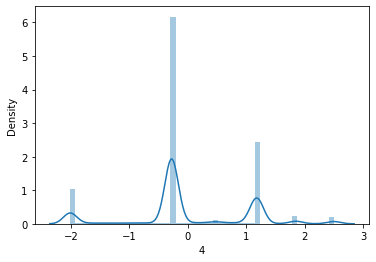

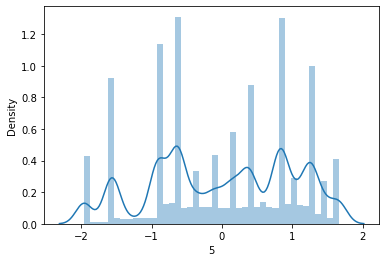

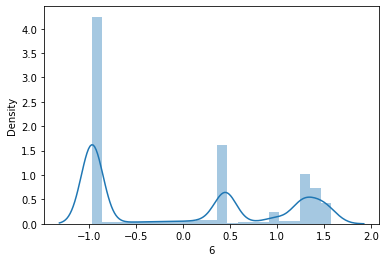

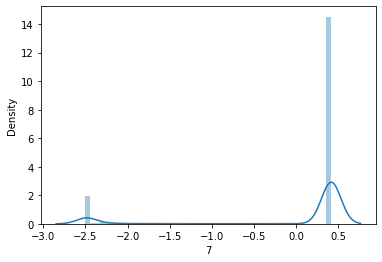

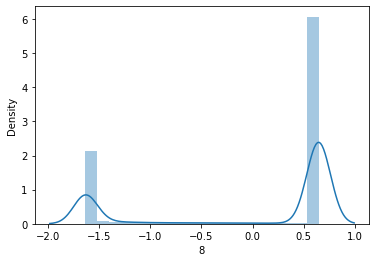

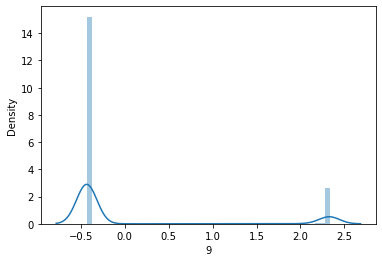

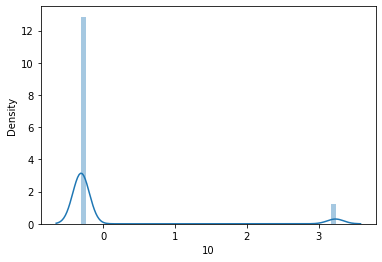

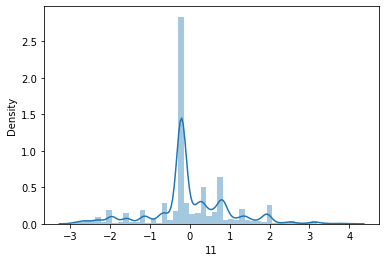

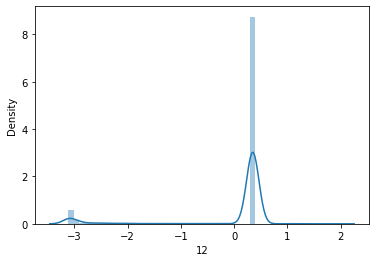

In [160]:
for i in range(13):

    sns.distplot(df_new2[df_new2.columns[i]])
    
    plt.show()

# Model Building

In [161]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, RandomizedSearchCV


In [162]:
x.shape

(48110, 13)

In [165]:
#finding best random state
maxAccu=0
maxRS=0
for i in range(0,2000):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=i)
    lr=LogisticRegression()
    lr.fit(x_train,y_train)
    predlr=lr.predict(x_test)
    acc=accuracy_score(y_test,predlr)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy score is :",maxAccu,"on random state  ",maxRS)

Best accuracy score is : 0.7669923092912077 on random state   1032


In [166]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1032)


In [167]:
x_train

array([[ 0.52370007, -0.01241573, -1.26890322, ..., -0.30997283,
         0.29218469,  0.34993339],
       [ 0.04839161, -0.01241573,  0.53787026, ..., -0.30997283,
         0.81908399,  0.34993339],
       [-1.38650299, -0.01241573, -1.63226181, ..., -0.30997283,
        -2.87767668,  1.06610471],
       ...,
       [-0.7225021 ,  1.72769374,  1.89028987, ..., -0.30997283,
         1.93697111,  0.34993339],
       [ 1.33436775, -0.01241573, -0.60048326, ...,  3.23740086,
         0.81908399,  0.34993339],
       [-0.81339114, -0.01241573, -0.40777186, ..., -0.30997283,
        -0.21159865,  0.34993339]])

In [168]:
x_test

array([[ 0.44630161,  1.72769374,  0.20991593, ..., -0.30997283,
         0.29218469,  0.34993339],
       [ 0.90092859, -0.01241573,  2.18285941, ..., -0.30997283,
         0.81908399,  0.34993339],
       [ 0.28939087,  0.86781212, -0.2225596 , ..., -0.30997283,
         0.81908399,  0.34993339],
       ...,
       [ 0.04839161, -1.16943675, -0.22304583, ..., -0.30997283,
        -0.59690146,  0.34993339],
       [ 0.28939087, -0.01241573,  0.21429757, ..., -0.30997283,
        -0.21159865,  0.34993339],
       [-0.0335461 , -0.01241573, -0.64943385, ..., -0.30997283,
         1.14574287,  0.34993339]])

In [169]:
y_train

26013    0.0
10365    1.0
20470    0.0
3372     1.0
25989    1.0
        ... 
7594     1.0
13277    1.0
13879    0.0
37818    1.0
21720    1.0
Name: Income, Length: 33677, dtype: float64

In [170]:
y_test

4828     0.0
46917    1.0
44212    1.0
16821    0.0
11242    0.0
        ... 
44994    1.0
37863    1.0
42549    1.0
1730     1.0
36322    1.0
Name: Income, Length: 14433, dtype: float64

In [171]:
print("x_train shape =",x_train.shape)
print("x_test shape =",x_test.shape)
print("y_train shape =",y_train.shape)
print("y_test shape =",y_test.shape)

x_train shape = (33677, 13)
x_test shape = (14433, 13)
y_train shape = (33677,)
y_test shape = (14433,)


In [172]:
lg=LogisticRegression()
gnb=GaussianNB()
svc=SVC()
dtc=DecisionTreeClassifier()
knn=KNeighborsClassifier()
rfc=RandomForestClassifier()
grb=GradientBoostingClassifier()
adb=AdaBoostClassifier()

In [173]:
model=[lg,gnb,svc,dtc,knn,rfc,grb,adb]

In [174]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('Accuracy score of ',m,'is')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm))
    print('#'*100)

Accuracy score of  LogisticRegression() is
0.7669923092912077
[[5395 1891]
 [1472 5675]]
              precision    recall  f1-score   support

         0.0       0.79      0.74      0.76      7286
         1.0       0.75      0.79      0.77      7147

    accuracy                           0.77     14433
   macro avg       0.77      0.77      0.77     14433
weighted avg       0.77      0.77      0.77     14433

####################################################################################################
Accuracy score of  GaussianNB() is
0.7866694380932585
[[5601 1685]
 [1394 5753]]
              precision    recall  f1-score   support

         0.0       0.80      0.77      0.78      7286
         1.0       0.77      0.80      0.79      7147

    accuracy                           0.79     14433
   macro avg       0.79      0.79      0.79     14433
weighted avg       0.79      0.79      0.79     14433

###########################################################################

# Checking Cross Val Score

In [175]:
from sklearn.model_selection import cross_val_score
for i in range(2,10):
    print("For CV =",i)
    for m in model:
        scr=cross_val_score(m,x,y,cv=i)
        print("cross validation score of",m,"is =",scr.mean())
    print('*'*100)

For CV = 2
cross validation score of LogisticRegression() is = 0.7529827478694657
cross validation score of GaussianNB() is = 0.7749324464768239
cross validation score of SVC() is = 0.8230097692787361
cross validation score of DecisionTreeClassifier() is = 0.8161089170650593
cross validation score of KNeighborsClassifier() is = 0.8235086260652671
cross validation score of RandomForestClassifier() is = 0.8470796092288505
cross validation score of GradientBoostingClassifier() is = 0.8498441072542091
cross validation score of AdaBoostClassifier() is = 0.8487008937850758
****************************************************************************************************
For CV = 3
cross validation score of LogisticRegression() is = 0.7534610036627541
cross validation score of GaussianNB() is = 0.7752651872709819
cross validation score of SVC() is = 0.8233845083829824
cross validation score of DecisionTreeClassifier() is = 0.8101242349275664
cross validation score of KNeighborsClassifier() 

   we get best accuracy score from RandomforrestClassifier at CV=9

# Parameter Tuning for RandomForestClassifier

In [176]:
#creating parameter list to pass in GreadSearchCV
parameters={'max_features':['auto','sqrt','log2'],'max_depth':[4,5,6,7,8],'criterion':['gini','entropy']}
gcv1=GridSearchCV(RandomForestClassifier(),parameters,cv=9,scoring='accuracy')
gcv1.fit(x_train,y_train)
gcv1.best_params_

{'criterion': 'gini', 'max_depth': 8, 'max_features': 'auto'}

In [177]:
gcv1.best_estimator_

RandomForestClassifier(max_depth=8, max_features='auto')

In [178]:
final_model=gcv1.best_estimator_

In [179]:
final_model.fit(x_train,y_train)
predm1=final_model.predict(x_test)
predm2=final_model.predict(x_train)
print('Test Accuracy score of final model =',accuracy_score(y_test,predm1))
print('Train Accuracy score of final model =',accuracy_score(y_train,predm2))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))

Test Accuracy score of final model = 0.8668329522621769
Train Accuracy score of final model = 0.8696142768061288
[[6371  915]
 [ 772 6375]]
              precision    recall  f1-score   support

         0.0       0.89      0.87      0.88      7286
         1.0       0.87      0.89      0.88      7147

    accuracy                           0.88     14433
   macro avg       0.88      0.88      0.88     14433
weighted avg       0.88      0.88      0.88     14433



# ROCAUC curve

In [180]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=lg.predict_proba(x_test)[:,1]
y_pred_prob

array([0.71913984, 0.71687143, 0.61461029, ..., 0.90261948, 0.94202099,
       0.64300706])

In [181]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

In [182]:
fpr

array([0.       , 0.       , 0.       , ..., 0.9581389, 0.9584134,
       1.       ])

In [183]:
tpr

array([0.00000000e+00, 1.39918847e-04, 2.51853925e-03, ...,
       1.00000000e+00, 1.00000000e+00, 1.00000000e+00])

In [184]:
thresholds

array([1.99774519, 0.99774519, 0.99195129, ..., 0.03988295, 0.03987409,
       0.01162309])

In [185]:
auc_score=roc_auc_score(y_test,final_model.predict(x_test))
print("roc_auc_score=",auc_score)

roc_auc_score= 0.8674278717959285


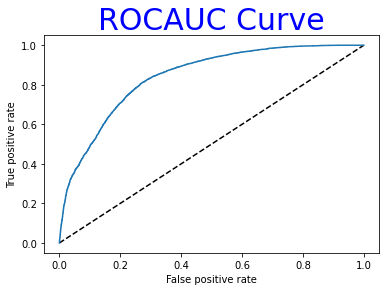

In [186]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROCAUC Curve',color='Blue',size=30)
plt.show()

# Saving nodel:

In [188]:
                                                                    
import joblib                                                                                                     
joblib.dump(final_model,'Census Income Project Model.pkl')

['Census Income Project Model.pkl']